In [1]:
from yugiquery import *
header('Cards')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Last modified: 11/01/2023 23:01 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
    *   [1.3  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load previous data](#Load-previous-data)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualization](#Data-visualization)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Card types](#Card-types)
    *   [4.3  Monsters](#Monsters)
        *   [4.3.1  Attributes](#Attributes)
        *   [4.3.2  Primary types](#Primary-types)
            *   [4.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [4.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [4.3.2.3  By attribute](#By-attribute)
        *   [4.3.3  Secondary types](#Secondary-types)
            *   [4.3.3.1  By attribute](#By-attribute)
            *   [4.3.3.2  By secondary type](#By-secondary-type)
        *   [4.3.4  Monster types](#Monster-types)
            *   [4.3.4.1  By Attribute](#By-Attribute)
            *   [4.3.4.2  By primary type](#By-primary-type)
            *   [4.3.4.3  By secondary type](#By-secondary-type)
        *   [4.3.5  Effect type](#Effect-type)
        *   [4.3.6  ATK](#ATK)
        *   [4.3.7  DEF](#DEF)
        *   [4.3.8  Level/Rank](#Level/Rank)
            *   [4.3.8.1  ATK statistics](#ATK-statistics)
            *   [4.3.8.2  DEF statistics](#DEF-statistics)
        *   [4.3.9  Pendulum scale](#Pendulum-scale)
            *   [4.3.9.1  ATK statistics](#ATK-statistics)
            *   [4.3.9.2  DEF statistics](#DEF-statistics)
            *   [4.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [4.3.10  Link](#Link)
            *   [4.3.10.1  ATK statistics](#ATK-statistics)
        *   [4.3.11  Link Arrows](#Link-Arrows)
            *   [4.3.11.1  By combination](#By-combination)
            *   [4.3.11.2  By unique](#By-unique)
            *   [4.3.11.3  By link](#By-link)
    *   [4.4  Spell & Trap](#Spell-&-Trap)
        *   [4.4.1  Properties](#Properties)
        *   [4.4.2  Effect type](#Effect-type)
            *   [4.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [4.5  Archseries](#Archseries)
        *   [4.5.1  By card type](#By-card-type)
        *   [4.5.2  By primary type](#By-primary-type)
        *   [4.5.3  By secondary type](#By-secondary-type)
        *   [4.5.4  By monster type](#By-monster-type)
        *   [4.5.5  By property](#By-property)
    *   [4.6  Artworks](#Artworks)
        *   [4.6.1  By card type](#By-card-type)
        *   [4.6.2  By primary type](#By-primary-type)
    *   [4.7  Errata](#Errata)
        *   [4.7.1  By card type](#By-card-type)
        *   [4.7.2  By primary type](#By-primary-type)
        *   [4.7.3  By artwork](#By-artwork)
    *   [4.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [4.8.1  TGC status](#TGC-status)
            *   [4.8.1.1  By card type](#By-card-type)
            *   [4.8.1.2  By monster type](#By-monster-type)
            *   [4.8.1.3  By archseries](#By-archseries)
        *   [4.8.2  OCG status](#OCG-status)
            *   [4.8.2.1  By card type](#By-card-type)
            *   [4.8.2.2  By monster type](#By-monster-type)
            *   [4.8.2.3  By archseries](#By-archseries)
        *   [4.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [5  Extras](#Extras)
    *   [5.1 Not yet released](#Not-yet-released)
*   [6  HTML export](#HTML-export)
<!-- *   [7  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

# Queries
monster_query = card_query(_property = False)
st_query = card_query(_primary = False, _secondary = False, _attribute = False, _monster_type = False, _stars = False, _atk = False, _def = False, _scale = False, _link = False, _arrows = False)

# Fetch Monster
monster_df = fetch_monster(monster_query, step = 1000, limit = 5000)

# Fetch Spell
spell_df = fetch_st(st_query, 'Spell', step = 1000, limit = 3000)

# Fetch Trap
trap_df = fetch_st(st_query, 'Trap', step = 1000, limit = 3000)

# Fetch errata
errata_df = pd.concat([fetch_errata('name'), fetch_errata('type')], axis=1).fillna(False)

  0%|          | 0/7 [00:00<?, ?attribute/s]

8040 results

2393 results

1823 results

532 results

719 results



## Merge data

In [3]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df, drop=True)
spell_df = merge_errata(spell_df, errata_df, drop=True)
trap_df = merge_errata(trap_df, errata_df, drop=True)

# Combine data frames
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)
full_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)
print('Data merged')

Data merged


## Save data

In [4]:
full_df.to_csv(f'../Data/All_cards_{timestamp.strftime("%Y%m%d")}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [5]:
# Get list of files
files_list = sorted(glob.glob('../Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(full_df.dtypes.to_dict())
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded


## Generate changelog

In [6]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../Data/Cards_changelog_{timestamp.strftime("%Y%m%d")}.csv', index = False)
        print('Changelog saved')

Artwork                     Page name  \
Name                                                                    
A World Shrouded in Darkness        NaN  A World Shrouded in Darkness   
A World Shrouded in Darkness        NaN                           NaN   
ALERT!                              NaN                           NaN   
ALERT!                              NaN                        ALERT!   
Abyss Actor - Liberty Dramatist     NaN                           NaN   
...                                 ...                           ...   
Weight Measuring                    NaN                           NaN   
White Zoa of Dogmatika              NaN        White Zoa of Dogmatika   
White Zoa of Dogmatika              NaN                           NaN   
Yaguramaru the Armored Ninja        NaN  Yaguramaru the Armored Ninja   
Yaguramaru the Armored Ninja        NaN                           NaN   

                                  Modification date Version  
Name                                                         
A World Shrouded in Darkness    2022-11-04 01:23:17     Old  
A World Shrouded in Darkness    2023-01-11 16:46:44     New  
ALERT!                          2023-01-11 16:15:00     New  
ALERT!                          2023-01-09 17:41:12     Old  
Abyss Actor - Liberty Dramatist 2023-01-11 17:51:31     New  
...                                             ...     ...  
Weight Measuring                2023-01-11 16:46:22     New  
White Zoa of Dogmatika          2022-10-15 08:54:34     Old  
White Zoa of Dogmatika          2023-01-11 17:14:00     New  
Yaguramaru the Armored Ninja    2022-10-15 09:04:08     Old  
Yaguramaru the Armored Ninja    2023-01-11 17:13:54     New  

[317 rows x 4 columns]

Changelog saved


# Data visualization

## Full data

In [7]:
full_df

Name  Password     Card type  \
0           "A" Cell Breeding Device  34541863    Spell Card   
1                 "A" Cell Incubator  64163367    Spell Card   
2      "A" Cell Recombination Device  91231901    Spell Card   
3             "A" Cell Scatter Burst  73262676    Spell Card   
4       "Infernoble Arms - Durendal"  37478723    Spell Card   
...                              ...       ...           ...   
12251                  Zubaba Knight  97896503  Monster Card   
12252        Zubababancho Gagagacoat  23720856  Monster Card   
12253      Zuijin of the Ice Barrier  43256007  Monster Card   
12254     Zure, Knight of Dark World  07459013  Monster Card   
12255      Zushin the Sleeping Giant  67547370  Monster Card   

                    Property  \
0      Continuous Spell Card   
1      Continuous Spell Card   
2      Quick-Play Spell Card   
3      Quick-Play Spell Card   
4           Equip Spell Card   
...                      ...   
12251                    NaN   
12252                    NaN   
12253                    NaN   
12254                    NaN   
12255                    NaN   

                                             Effect type        Archseries  \
0                                      (Trigger Effect,)               NaN   
1               (Continuous-like Effect, Trigger Effect)               NaN   
2                         (Effect, Ignition-like Effect)               NaN   
3                                              (Effect,)               NaN   
4      (Condition, Ignition-like Effect, Trigger Effect)     (Noble Arms,)   
...                                                  ...               ...   
12251                                  (Trigger Effect,)         (Zubaba,)   
12252                       (Condition, Ignition Effect)  (Gagaga, Zubaba)   
12253                       (Condition, Ignition Effect)    (Ice Barrier,)   
12254                                                NaN     (Dark World,)   
12255  (Continuous Effect, Ignition Effect, Summoning...               NaN   

      Artwork TCG status OCG status   Modification date  ...    Primary type  \
0         NaN  Unlimited  Unlimited 2021-11-06 13:57:15  ...             NaN   
1         NaN  Unlimited  Unlimited 2022-06-13 04:27:51  ...             NaN   
2         NaN  Unlimited  Unlimited 2020-03-12 22:40:14  ...             NaN   
3         NaN  Unlimited  Unlimited 2021-11-06 13:58:32  ...             NaN   
4         NaN  Unlimited  Unlimited 2023-01-09 22:08:11  ...             NaN   
...       ...        ...        ...                 ...  ...             ...   
12251     NaN  Unlimited  Unlimited 2021-10-11 21:05:34  ...  Effect Monster   
12252     NaN  Unlimited  Unlimited 2022-07-21 23:21:12  ...  Effect Monster   
12253     NaN  Unlimited  Unlimited 2021-12-07 13:55:49  ...  Effect Monster   
12254     NaN  Unlimited  Unlimited 2022-12-01 16:13:43  ...  Normal Monster   
12255     NaN  Unlimited  Unlimited 2022-04-18 12:27:49  ...  Effect Monster   

      Secondary type Attribute Monster type Level/Rank   ATK   DEF  \
0                NaN       NaN          NaN        NaN   NaN   NaN   
1                NaN       NaN          NaN        NaN   NaN   NaN   
2                NaN       NaN          NaN        NaN   NaN   NaN   
3                NaN       NaN          NaN        NaN   NaN   NaN   
4                NaN       NaN          NaN        NaN   NaN   NaN   
...              ...       ...          ...        ...   ...   ...   
12251            NaN     EARTH      Warrior          3  1600   900   
12252            NaN     EARTH      Warrior          4  1800   100   
12253            NaN     WATER      Warrior          2   500   300   
12254            NaN      DARK        Fiend          4  1800  1500   
12255            NaN     EARTH      Warrior         10     0     0   

      Pendulum Scale Link Link Arrows  
0                NaN  NaN         NaN  
1                NaN  NaN         NaN  
2                Na

Full data available to download [here](../Data)

## Card types

In [8]:
full_df.groupby('Card type').nunique()

Name  Password  Property  Effect type  Archseries  Artwork  \
Card type                                                                  
Monster Card  8032      7903         0          224        1001        3   
Spell Card    2391      2365         6          116         398        3   
Trap Card     1823      1799         3           95         325        2   

              TCG status  OCG status  Modification date  Errata  Primary type  \
Card type                                                                       
Monster Card           7           7               7975       3             8   
Spell Card             6           6               2371       3             0   
Trap Card              6           5               1816       3             0   

              Secondary type  Attribute  Monster type  Level/Rank  ATK  DEF  \
Card type                                                                     
Monster Card               6          7            25          15   82   77   
Spell Card                 0          0             0           0    0    0   
Trap Card                  0          0             0           0    0    0   

              Pendulum Scale  Link  Link Arrows  
Card type                                        
Monster Card              13     6           62  
Spell Card                 0     0            0  
Trap Card                  0     0            0

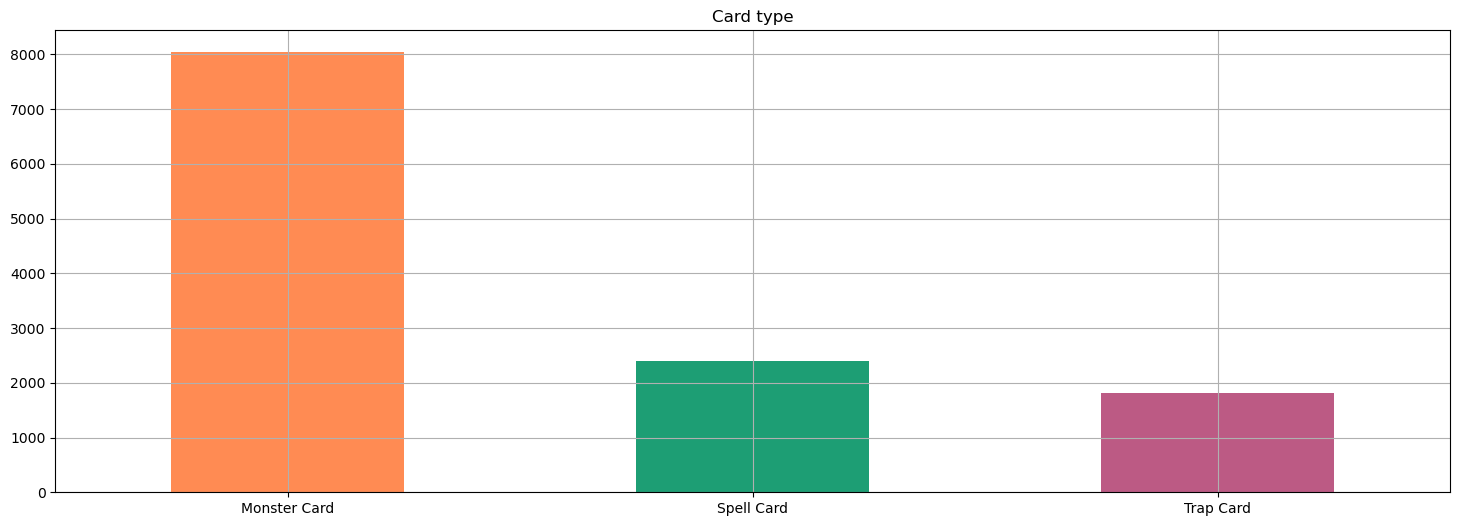

In [9]:
card_type_colors = [colors_dict[i] for i in full_df['Card type'].value_counts().index]
full_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [10]:
print('Total number of attributes:', monster_df['Attribute'].nunique())

Total number of attributes: 7


In [11]:
monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

Name  Password  Primary type  Secondary type  Monster type  \
Attribute                                                               
DARK       2232      2194             7               6            23   
DIVINE        6         0             1               0             2   
EARTH      1885      1863             7               6            23   
FIRE        668       666             8               6            22   
LIGHT      1635      1590             7               6            23   
WATER       839       832             7               6            22   
WIND        767       758             7               6            23   

           Level/Rank  ATK  DEF  Pendulum Scale  Link  Link Arrows  \
Attribute                                                            
DARK               14   70   63              12     6           42   
DIVINE              2    3    3               0     0            0   
EARTH              12   71   60              12     4           29   
FIRE               12   43   40               8     4           22   
LIGHT              14   58   50              10     5           30   
WATER              11   56   41               9     4           16   
WIND               12   46   38              11     4           14   

           Effect type  Archseries  Artwork  TCG status  OCG status  \
Attribute                                                             
DARK               155         454        3           7           7   
DIVINE               6           3        1           2           2   
EARTH              128         331        3           6           6   
FIRE                85         186        3           4           5   
LIGHT              132         389        3           6           6   
WATER               93         206        3           6           7   
WIND               105         215        3           7           7   

           Modification date  Errata  
Attribute                             
DARK                    2228       3  
DIVINE                     9       3  
EARTH                   1880       3  
FIRE                     665       3  
LIGHT                   1628       3  
WATER                    839       3  
WIND                     764       3

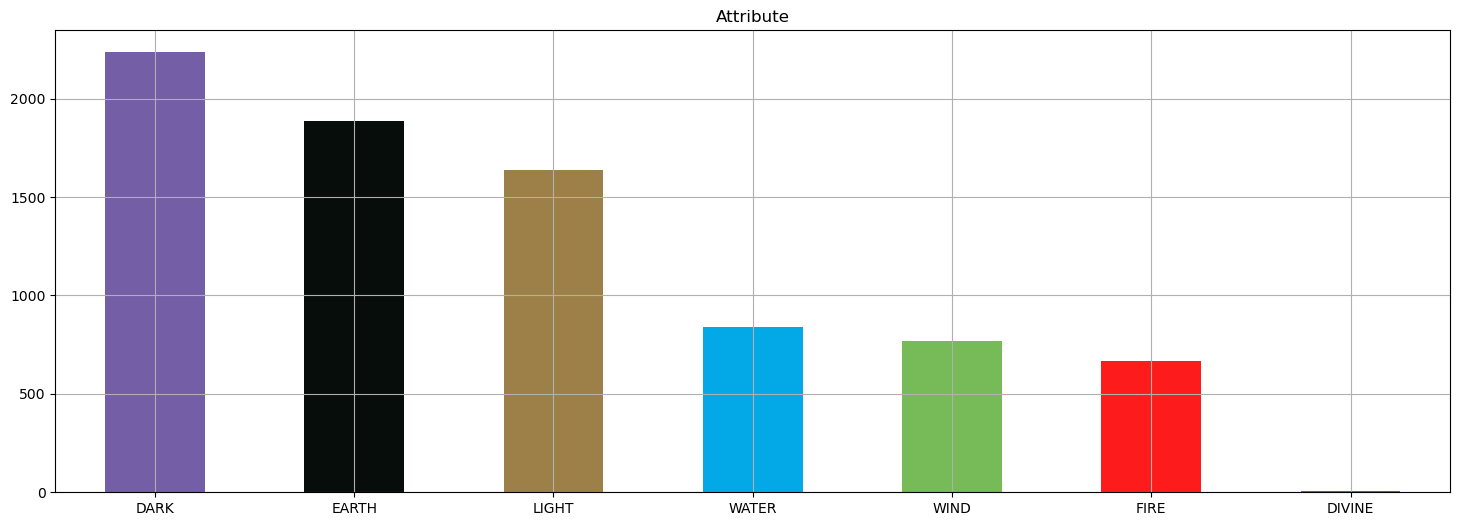

In [12]:
attribute_colors = [colors_dict[i] for i in monster_df['Attribute'].value_counts().index]
monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [13]:
print('Total number of primary types:', monster_df['Primary type'].nunique())

Total number of primary types: 8


In [14]:
monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

Name  Password  Secondary type  Attribute  Monster type  \
Primary type                                                               
Effect Monster   5451      5398               6          7            25   
Fusion Monster    433       427               1          6            23   
Link Monster      373       363               0          6            23   
Monster Token       1         0               0          1             1   
Normal Monster    746       701               1          6            23   
Ritual Monster    120       119               3          6            15   
Synchro Monster   417       409               1          6            23   
Xyz Monster       495       486               0          6            23   

                 Level/Rank  ATK  DEF  Pendulum Scale  Link  Link Arrows  \
Primary type                                                               
Effect Monster           12   73   66              13     0            0   
Fusion Monster           12   48   46               4     0            0   
Link Monster              0   39    0               0     6           62   
Monster Token             1    1    1               0     0            0   
Normal Monster           10   59   49              10     0            0   
Ritual Monster           12   33   26               1     0            0   
Synchro Monster          13   40   38               4     0            0   
Xyz Monster              14   51   42               5     0            0   

                 Effect type  Archseries  Artwork  TCG status  OCG status  \
Primary type                                                                
Effect Monster           204         781        3           6           6   
Fusion Monster            68         140        3           4           5   
Link Monster              52         138        3           5           6   
Monster Token              0           1        0           0           1   
Normal Monster             6         129        3           4           5   
Ritual Monster            33          37        1           2           2   
Synchro Monster           56         159        2           5           5   
Xyz Monster               69         193        2           6           5   

                 Modification date  Errata  
Primary type                                
Effect Monster                5417       3  
Fusion Monster                 431       3  
Link Monster                   370       2  
Monster Token                    1       0  
Normal Monster                 747       3  
Ritual Monster                 120       3  
Synchro Monster                416       3  
Xyz Monster                    490       2

#### Has effect discrimination

In [15]:
has_effect = monster_df['Primary type'].where(monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = monster_df['Primary type'].where(monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

Effect  No Effect
Effect Monster     5451          0
Xyz Monster         493          2
Synchro Monster     414          3
Fusion Monster      372         61
Link Monster        368          5
Ritual Monster      105         15
Normal Monster       34        713
Monster Token         0          1

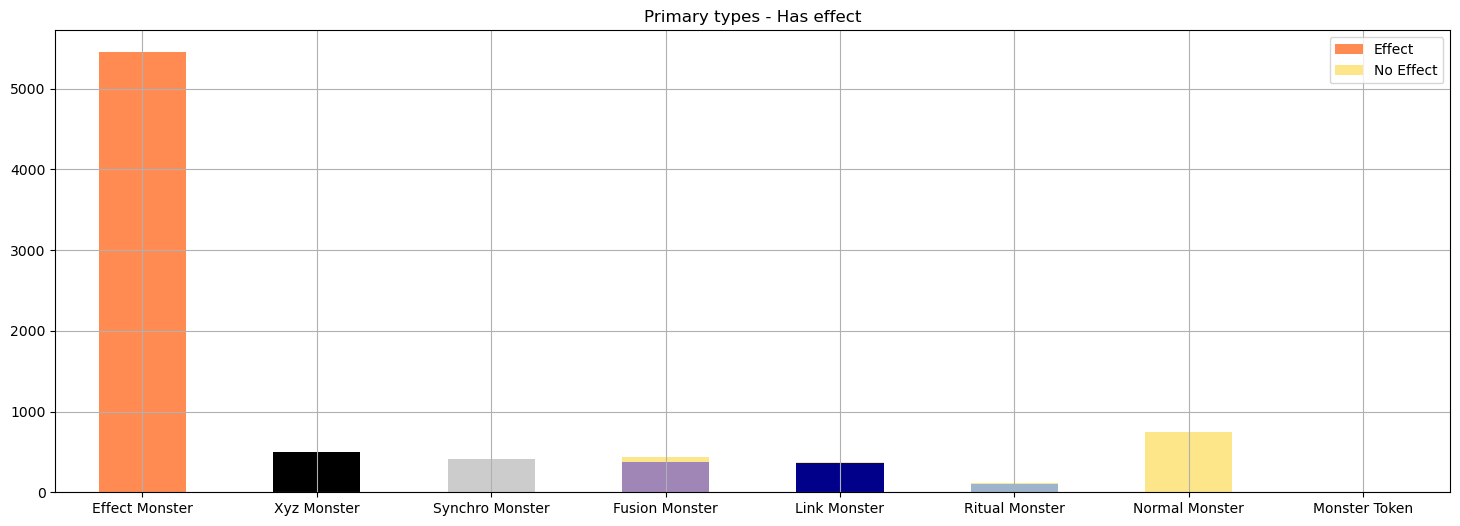

In [16]:
monster_type_colors = {'No Effect': colors_dict['Normal Monster'], 'Effect': [colors_dict[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [17]:
not_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1).fillna(0).astype(int)
pendulum

Not Pendulum  Pendulum
Effect Monster           5185       266
Normal Monster            709        38
Xyz Monster               486         9
Fusion Monster            423        10
Synchro Monster           410         7
Link Monster              373         0
Ritual Monster            119         1
Monster Token               1         0

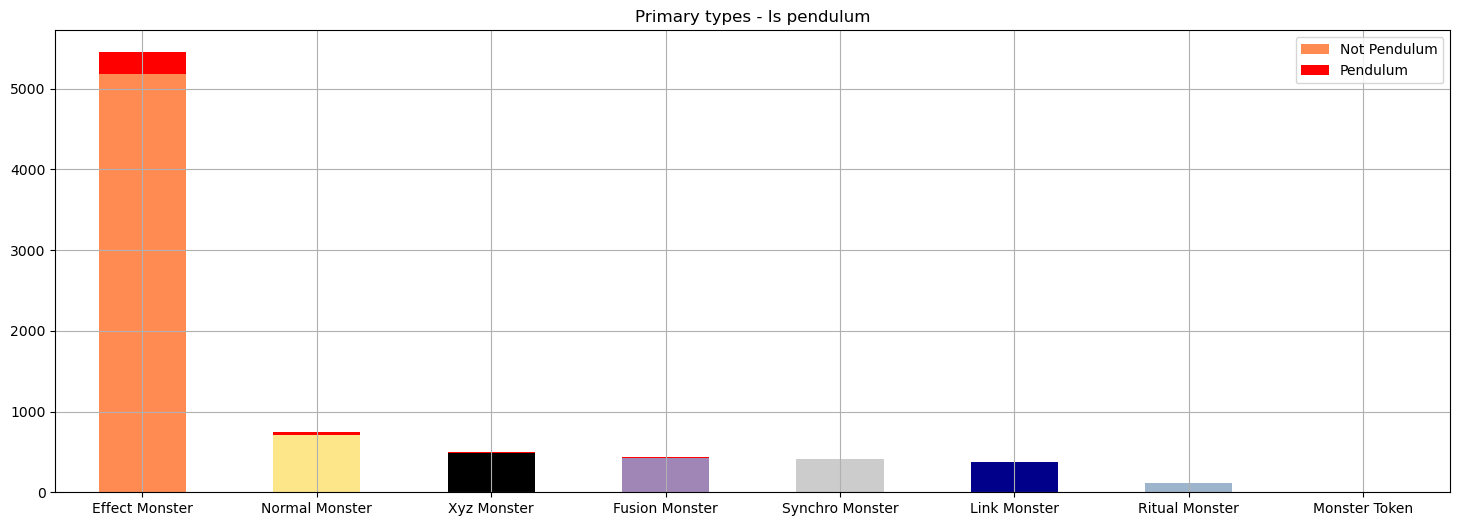

In [18]:
monster_type_colors_b = {'Pendulum': colors_dict['Pendulum Monster'], 'Not Pendulum': [colors_dict[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [19]:
primmary_crosstab = pd.crosstab(full_df['Primary type'],full_df['Attribute'])
primmary_crosstab

Attribute        DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Primary type                                                  
Effect Monster   1495       6   1310   453   1101    554   532
Fusion Monster    150       0     81    34     99     35    34
Link Monster      123       0     76    33     87     29    25
Monster Token       0       0      0     1      0      0     0
Normal Monster    186       0    250    52     83    109    67
Ritual Monster     36       0     17     7     34     20     6
Synchro Monster   110       0     70    50     77     36    74
Xyz Monster       135       0     83    38    154     56    29

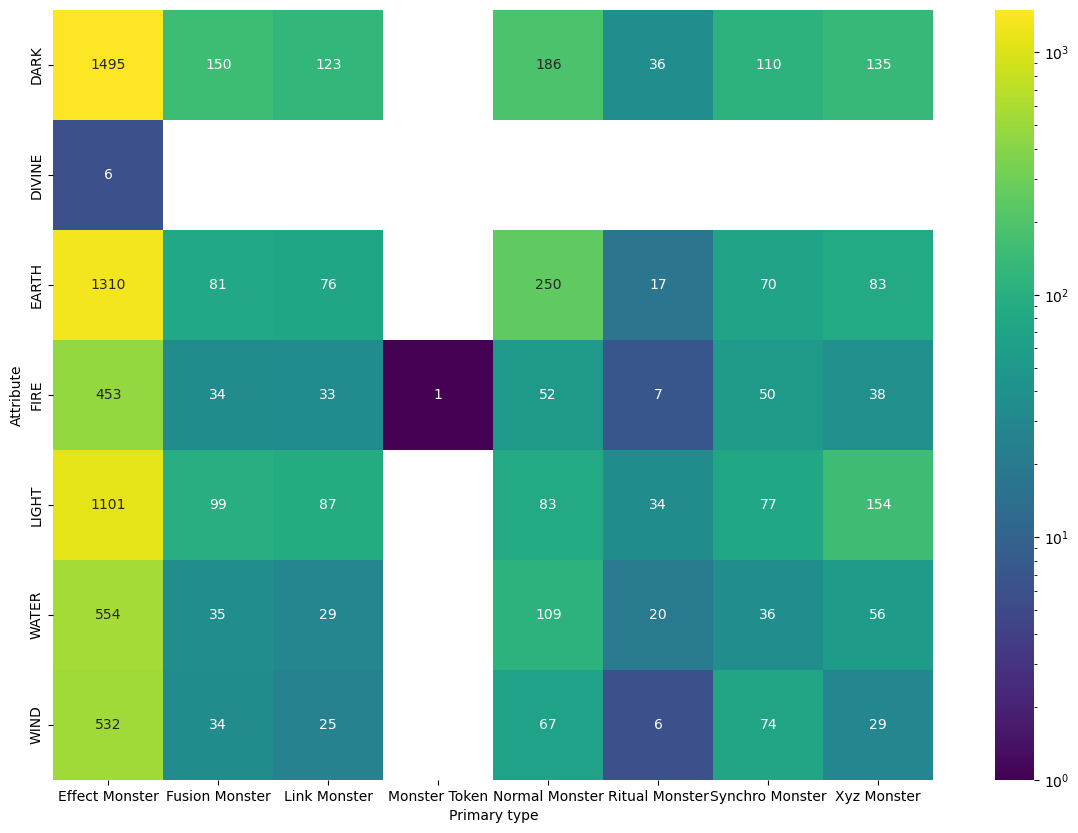

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Secondary types

In [21]:
print('Total number of secondary types:', monster_df['Secondary type'].nunique())

Total number of secondary types: 6


In [22]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

Name  Password  Primary type  Attribute  Monster type  \
Secondary type                                                          
Flip monster     185       184             2          6            19   
Gemini monster    45        45             1          6            18   
Spirit monster    38        37             2          6            13   
Toon monster      17        17             1          6             7   
Tuner monster    479       470             5          6            23   
Union monster     37        37             1          6             9   

                Level/Rank  ATK  DEF  Pendulum Scale  Effect type  Archseries  \
Secondary type                                                                  
Flip monster            12   38   33               1           20          46   
Gemini monster           8   17   19               0            6          13   
Spirit monster          10   22   20               2            7           4   
Toon monster             5   12   15               0            8          13   
Tuner monster            9   32   32               7           59         137   
Union monster            8   17   14               0            6           9   

                Artwork  TCG status  OCG status  Modification date  Errata  
Secondary type                                                              
Flip monster          1           3           4                185       3  
Gemini monster        0           1           1                 45       3  
Spirit monster        1           2           3                 38       1  
Toon monster          1           1           2                 17       2  
Tuner monster         3           4           4                479       3  
Union monster         1           1           1                 37       2

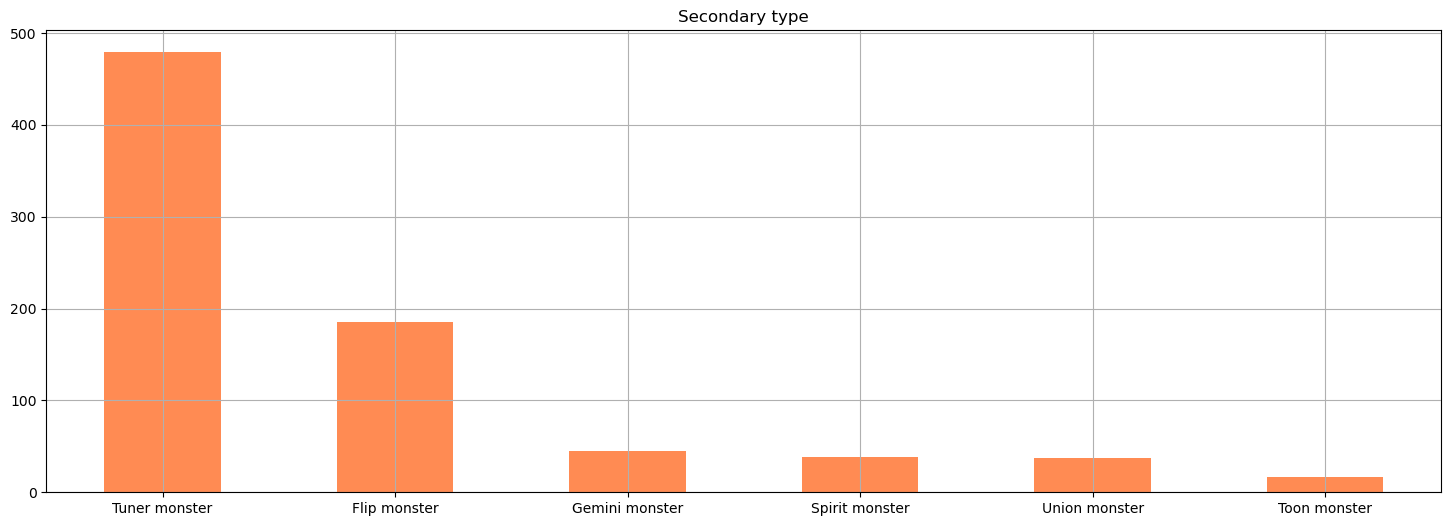

In [23]:
secondary_type_colors = colors_dict['Effect Monster']
monster_df['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [24]:
secondary_crosstab = pd.crosstab(full_df['Secondary type'],full_df['Attribute'])
secondary_crosstab

Attribute       DARK  EARTH  FIRE  LIGHT  WATER  WIND
Secondary type                                       
Flip monster      51     62    10     32     13    17
Gemini monster    11      8     8      6      8     4
Spirit monster     5      6     6      4      6    11
Toon monster       7      5     1      2      1     1
Tuner monster    124     93    43     96     53    70
Union monster      6      9     3     12      4     3

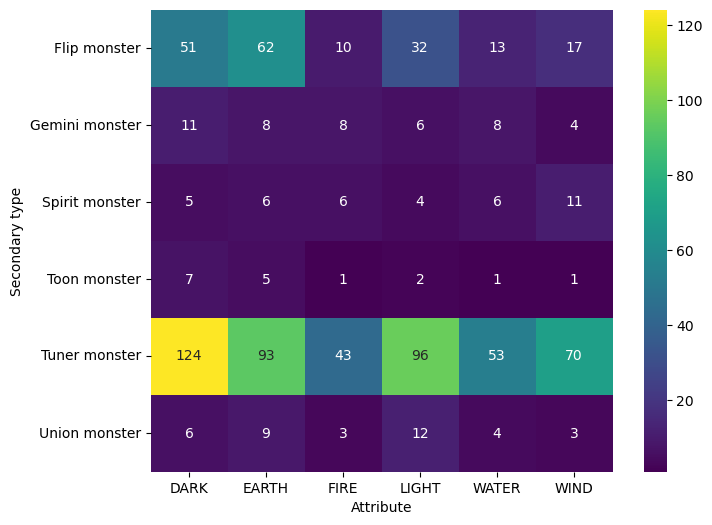

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [26]:
secondary_crosstab_b = pd.crosstab(full_df['Primary type'],full_df['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type   Flip monster  Gemini monster  Spirit monster  Toon monster  \
Primary type                                                                  
Effect Monster            184              45              36            17   
Fusion Monster              0               0               0             0   
Normal Monster              0               0               0             0   
Ritual Monster              1               0               2             0   
Synchro Monster             0               0               0             0   
All                       185              45              38            17   

Secondary type   Tuner monster  Union monster  All  
Primary type                                        
Effect Monster             432             37  751  
Fusion Monster               3              0    3  
Normal Monster              12              0   12  
Ritual Monster               2              0    5  
Synchro Monster             30              0   30  
All                        479             37  801

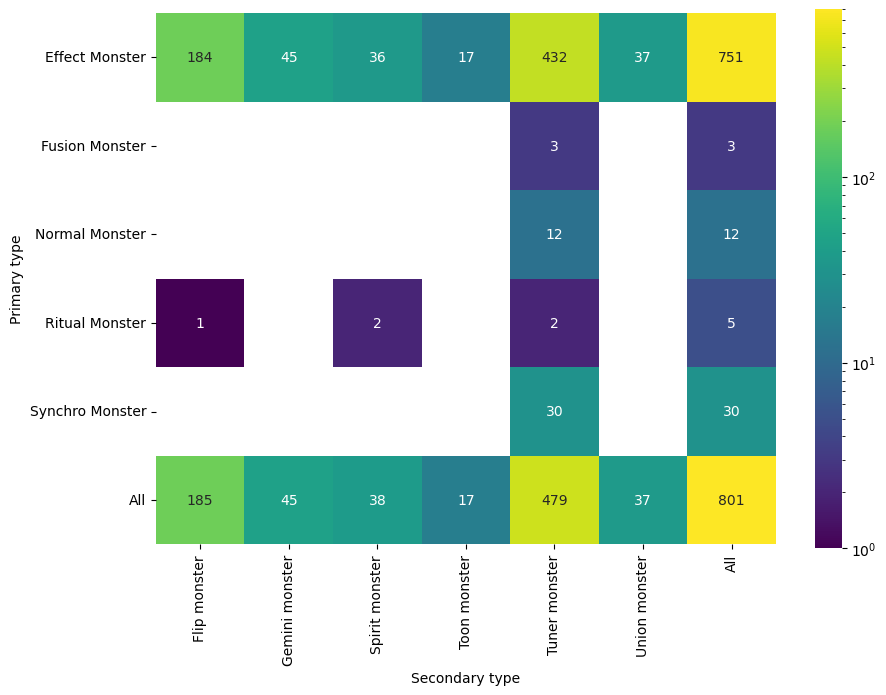

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Monster types

In [28]:
print('Total number of monster types:', monster_df['Monster type'].nunique())

Total number of monster types: 25


In [29]:
monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

Name  Password  Primary type  Secondary type  Attribute  \
Monster type                                                             
Aqua            256       253             7               6          6   
Beast           378       369             7               4          6   
Beast-Warrior   238       233             7               3          6   
Creator God       1         0             1               0          1   
Cyberse         255       246             7               1          6   
Dinosaur        122       121             6               1          6   
Divine-Beast      5         0             1               0          1   
Dragon          660       653             7               6          6   
Fairy           517       502             7               5          6   
Fiend           765       755             7               6          6   
Fish            127       127             7               2          5   
Insect          250       249             7               3          6   
Machine         931       912             7               5          6   
Plant           235       233             6               4          6   
Psychic         181       177             6               2          6   
Pyro            121       120             7               5          5   
Reptile         172       171             6               3          6   
Rock            247       245             7               4          6   
Sea Serpent      82        82             6               3          6   
Spellcaster     679       667             7               5          6   
Thunder         129       126             6               4          6   
Warrior        1035      1022             7               6          6   
Winged Beast    315       312             7               5          6   
Wyrm             88        87             6               1          6   
Zombie          243       241             7               5          6   

               Level/Rank  ATK  DEF  Pendulum Scale  Link  Link Arrows  \
Monster type                                                             
Aqua                   10   50   33               3     2            3   
Beast                  10   48   38               7     2            7   
Beast-Warrior          10   36   29               6     3            7   
Creator God             1    1    1               0     0            0   
Cyberse                11   30   29               1     6           39   
Dinosaur               10   35   30               4     2            3   
Divine-Beast            1    3    3               0     0            0   
Dragon                 13   52   48               9     5           19   
Fairy                  12   43   38               9     4           12   
Fiend                  13   60   45              12     5           14   
Fish                   10   34   28               1     1            1   
Insect                 12   45   33               2     3            7   
Machine                12   62   55               9     4           23   
Plant                   9   37   30               5     4            9   
Psychic                11   35   31               5     2            3   
Pyro                   11   34   29               0     1            1   
Reptile                11   37   30               3     2            3   
Rock                   11   43   40               4     3            4   
Sea Serpent            10   28   26               1     2            2   
Spellcaster            12   50   42              10     5           12   
Thunder                10   35   29               1     2            4   
Warrior                13   60   41               6     3           15   
Winged Beast           10   39   29               4     4            6   
Wyrm                   11   26   24               3     4            6   
Zombie                 12   38   37               2     3            5   

               Ef

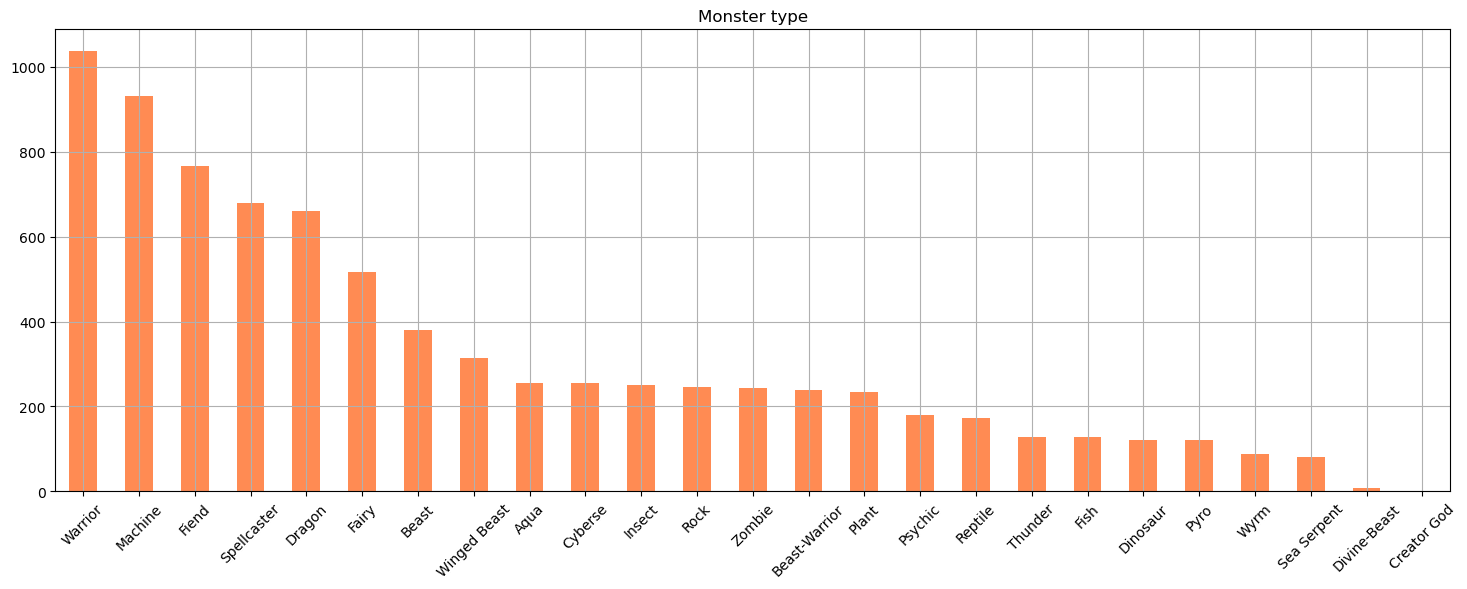

In [30]:
monster_type_colors = colors_dict['Monster Card']
monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [31]:
monster_crosstab = pd.crosstab(full_df['Monster type'],full_df['Attribute'], dropna=False)
monster_crosstab

Attribute      DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Monster type                                                
Aqua              9       0      6    10      4    221     6
Beast            37       0    213    16     74     14    25
Beast-Warrior    37       0     83    54     33     16    15
Creator God       0       1      0     0      0      0     0
Cyberse          71       0     37    44     63     28    12
Dinosaur         11       0     60    32      5      8     6
Divine-Beast      0       8      0     0      0      0     0
Dragon          256       0     47    48    168     28   113
Fairy            57       0     63    17    328     27    25
Fiend           577       0     34    47     70     23    16
Fish              2       0      2     0      1    120     2
Insect           40       0    134     6     20      4    46
Machine         228       0    318    52    168     49   116
Plant            42       0    122    11     22     24    14
Psychic          23       0     37    17     47     13    44
Pyro              2       0      6   106      4      0     3
Reptile          39       0     34    15     45     35     4
Rock             16       0    199     5     15      5     7
Sea Serpent       3       0      1     1      2     71     4
Spellcaster     281       0     53    28    192     64    62
Thunder          14       0     10     5     77      4    19
Warrior         202       0    364   102    252     53    63
Winged Beast    112       0      7    16     15     12   153
Wyrm             15       0     19    11     23     12     8
Zombie          161       0     38    25      7      8     4

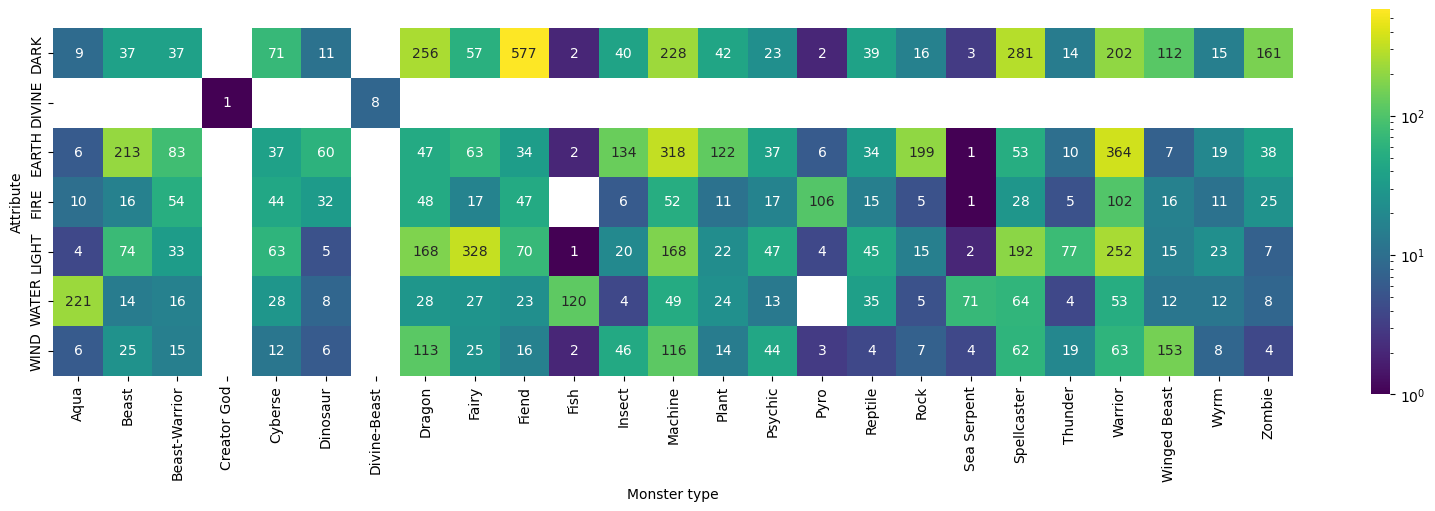

In [32]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

#### By primary type

In [33]:
monster_crosstab_b = pd.crosstab(full_df['Monster type'],full_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type   Effect Monster  Fusion Monster  Link Monster  Monster Token  \
Monster type                                                                 
Aqua                      154              11             3              0   
Beast                     273              17             9              0   
Beast-Warrior             164              11             9              0   
Creator God                 1               0             0              0   
Cyberse                   125               5            97              0   
Dinosaur                   87               7             3              0   
Divine-Beast                5               0             0              0   
Dragon                    347              64            33              0   
Fairy                     367              22            25              0   
Fiend                     535              46            28              0   
Fish                       91               5             1              0   
Insect                    185               4            10              0   
Machine                   646              47            39              0   
Plant                     163               6            15              0   
Psychic                   124              11             5              0   
Pyro                       84               8             1              1   
Reptile                   140               2             3              0   
Rock                      169              18             4              0   
Sea Serpent                55               2             2              0   
Spellcaster               512              26            26              0   
Thunder                    98               8             5              0   
Warrior                   680              95            29              0   
Winged Beast              228               9            10              0   
Wyrm                       55               2             9              0   
Zombie                    163               7             7              0   

Primary type   Normal Monster  Ritual Monster  Synchro Monster  Xyz Monster  
Monster type                                                                 
Aqua                       59               8                4           17  
Beast                      54               1               14           11  
Beast-Warrior              21               2                8           23  
Creator God                 0               0                0            0  
Cyberse                     7               7                5            9  
Dinosaur                   18               0                4            3  
Divine-Beast                0               0                0            0  
Dragon                     46              15               94           61  
Fairy                      36              17               18           32  
Fiend                      79              15               24           40  
Fish                       17               1                9            3  
Insect                     29               1                7           14  
Machine                    67               4               63           65  
Plant                      25               0                8           18  
Psychic                     9               0               19           13  
Pyro                       18               0                5            4  
Reptile                    19               0                5            3  
Rock                       28               7                5           16  
Sea Serpent                 8               0                5           10  
Spellcaster                55              18               17           26  
Thunder                    11               0                5            2  
Warrior                    81              14               55           82  
Winged Beast         

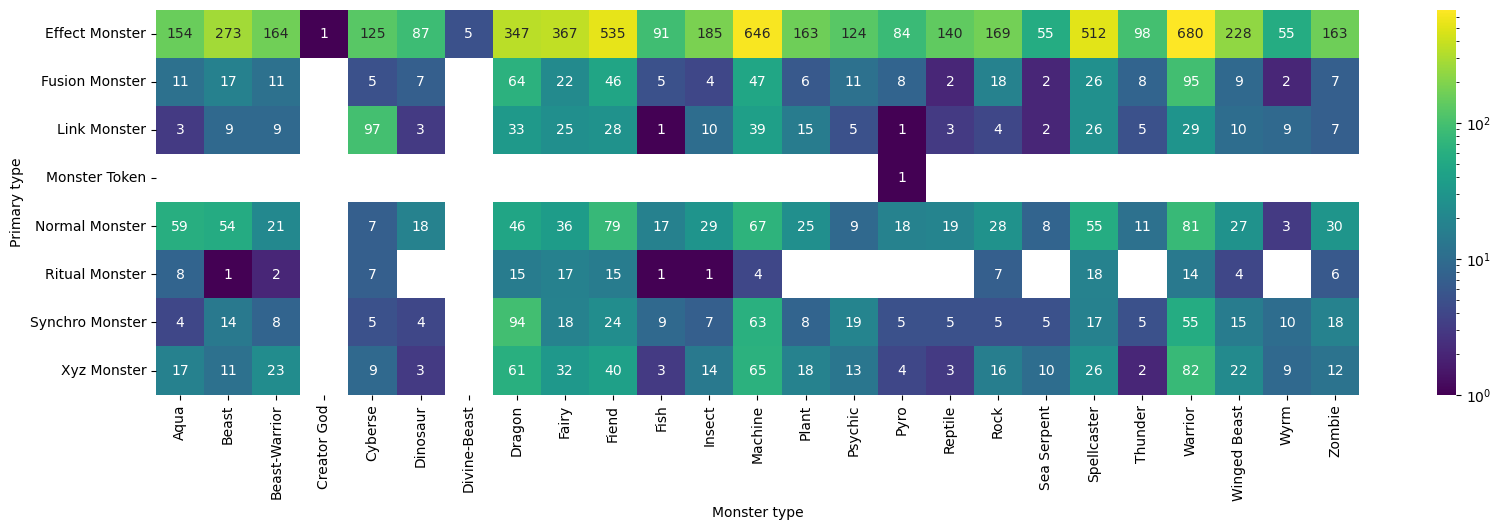

In [34]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

#### By secondary type

In [35]:
monster_crosstab_c = pd.crosstab(full_df['Monster type'],full_df['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type  Flip monster  Gemini monster  Spirit monster  Toon monster  \
Monster type                                                                 
Aqua                       4               4               1             1   
Beast                     15               1               2             0   
Beast-Warrior              1               0               1             0   
Cyberse                    0               0               0             0   
Dinosaur                   0               0               0             0   
Dragon                     1               6               1             3   
Fairy                      8               2               7             0   
Fiend                     27               4               2             1   
Fish                       0               1               0             0   
Insect                    20               2               0             0   
Machine                   10               1               0             4   
Plant                      4               1               0             0   
Psychic                    3               0               0             0   
Pyro                       4               2               2             0   
Reptile                   18               1               0             0   
Rock                      11               1               2             0   
Sea Serpent                1               1               0             0   
Spellcaster               34               3               4             4   
Thunder                    3               1               1             0   
Warrior                   12               9               6             3   
Winged Beast               5               2               7             1   
Wyrm                       0               0               0             0   
Zombie                     4               3               2             0   

Secondary type  Tuner monster  Union monster  
Monster type                                  
Aqua                       11              3  
Beast                      22              0  
Beast-Warrior               9              0  
Cyberse                     7              0  
Dinosaur                    7              0  
Dragon                     43              4  
Fairy                      22              5  
Fiend                      41              1  
Fish                        8              0  
Insect                     12              0  
Machine                    83             18  
Plant                      20              1  
Psychic                    24              0  
Pyro                        8              1  
Reptile                     7              0  
Rock                        3              0  
Sea Serpent                 9              0  
Spellcaster                40              0  
Thunder                     8              0  
Warrior                    32              3  
Winged Beast               31              0  
Wyrm                       10              0  
Zombie                     22              1

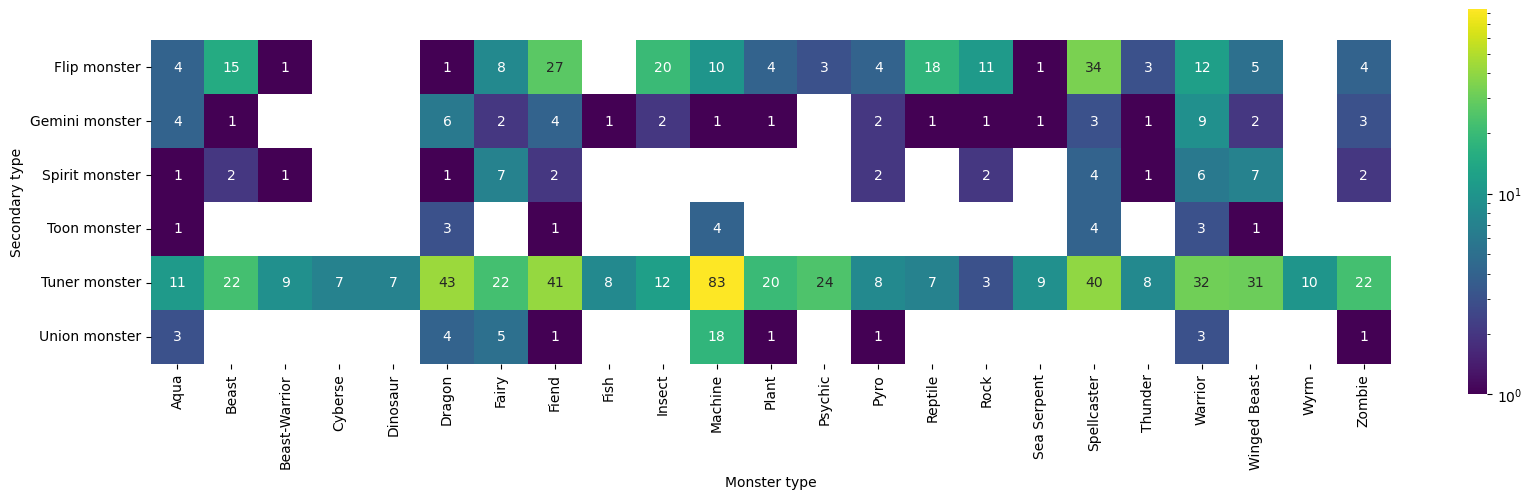

In [36]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

### Effect type

In [37]:
print('Total number of effect types:', monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [38]:
monster_df[monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

Name  Password  Primary type  Secondary type  \
Effect type                                                            
Activation condition       1         1             1               0   
Condition               3105      3032             7               6   
Continuous Effect       2165      2142             6               5   
Continuous-like Effect   235       234             6               3   
Flip effect              171       170             1               1   
Ignition Effect         2613      2592             6               6   
Ignition-like Effect     224       214             6               2   
Lingering effect          19        18             2               2   
Maintenance cost          44        44             3               0   
Quick Effect            1031      1012             6               4   
Quick-like Effect          4         4             1               0   
Summoning condition      920       881             6               4   
Trigger Effect          4335      4300             7               6   
Unclassified effect      819       807             6               5   

                        Attribute  Monster type  Level/Rank  ATK  DEF  \
Effect type                                                             
Activation condition            1             1           1    1    1   
Condition                       7            25          14   63   64   
Continuous Effect               7            24          14   59   52   
Continuous-like Effect          6            21          11   42   36   
Flip effect                     6            19          12   38   33   
Ignition Effect                 7            24          13   66   61   
Ignition-like Effect            6            20          12   35   33   
Lingering effect                6            14           8   13   14   
Maintenance cost                6            12           8   21   18   
Quick Effect                    6            23          13   50   48   
Quick-like Effect               1             1           1    3    2   
Summoning condition             7            25          13   52   51   
Trigger Effect                  7            24          14   66   63   
Unclassified effect             7            25          13   49   45   

                        Pendulum Scale  Link  Link Arrows  Archseries  \
Effect type                                                             
Activation condition                 1     0            0           1   
Condition                           13     6           54         648   
Continuous Effect                   12     6           48         559   
Continuous-like Effect              13     1            2          72   
Flip effect                          1     0            0          44   
Ignition Effect                     12     5           42         640   
Ignition-like Effect                13     1            1          76   
Lingering effect                     0     2            2          12   
Maintenance cost                     2     1            1           8   
Quick Effect                         9     6           29         396   
Quick-like Effect                    0     0            0           1   
Summoning condition                  9     5            7         316   
Trigger Effect                      13     6           51         772   
Unclassified effect                  9     5           12         277   

                        Artwork  TCG status  OCG status  Modification date  \
Effect type                                                                  
Activation condition          0           1           1                  1   
Condition                     3           5           6               3073   
Continuous Effect             3           5           5               2159   
Continuous-like Effect        2           3           3                235   
Flip effect                   1           3           4          

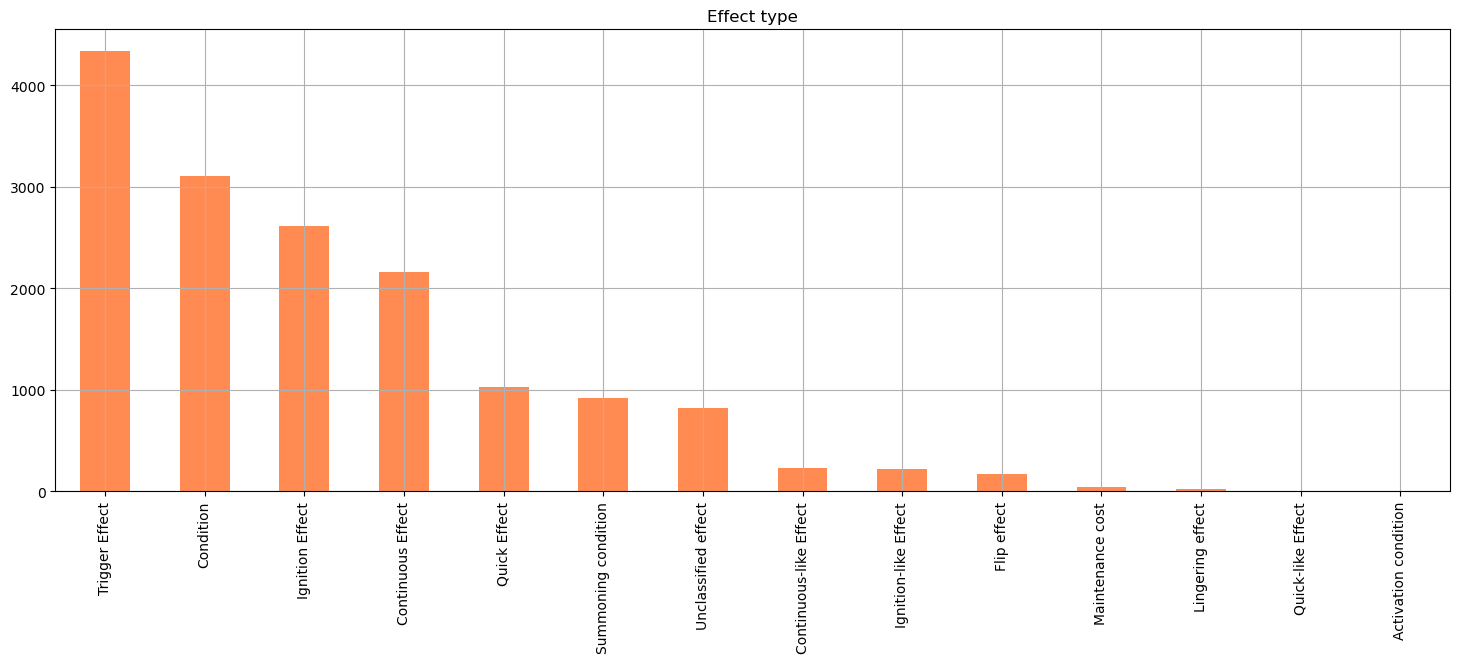

In [39]:
monster_effect_colors = colors_dict['Effect Monster']
monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [40]:
print('Total number of ATK values:', monster_df['ATK'].nunique())

Total number of ATK values: 82


In [41]:
monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Primary type  Secondary type  Attribute  Monster type  \
ATK                                                                           
0      625       592             8               5          6            23   
50       2         2             1               0          2             2   
100    218       217             5               3          6            20   
150      1         1             1               0          1             1   
200    120       118             6               5          6            20   
...    ...       ...           ...             ...        ...           ...   
4500    12        12             3               0          3             6   
4600     2         2             1               0          2             1   
5000     9         9             5               0          3             4   
?       83        75             6               1          7            20   
X000     1         0             0               0          1             1   

      Level/Rank  DEF  Pendulum Scale  Link  Link Arrows  Effect type  \
ATK                                                                     
0             13   35               9     5           15           94   
50             1    2               0     0            0            2   
100           11   27               8     2            2           48   
150            1    1               0     0            0            0   
200            7   21               4     1            2           35   
...          ...  ...             ...   ...          ...          ...   
4500           4    4               0     0            0           10   
4600           1    1               0     0            0            2   
5000           2    4               0     1            1            8   
?             15    8               2     1            1           34   
X000           1    1               0     0            0            0   

      Archseries  Artwork  TCG status  OCG status  Modification date  Errata  
ATK                                                                           
0            236        3           7           6                623       3  
50             2        0           1           1                  2       0  
100          107        2           4           3                218       3  
150            0        0           1           1                  1       0  
200           68        1           3           4                120       3  
...          ...      ...         ...         ...                ...     ...  
4500           9        1           1           1                 12       1  
4600           1        1           1           1                  2       0  
5000           6        1           1           1                  9       1  
?             36        3           4           4                 84       3  
X000           1        0           1           1                  1       0  

[82 rows x 18 columns]

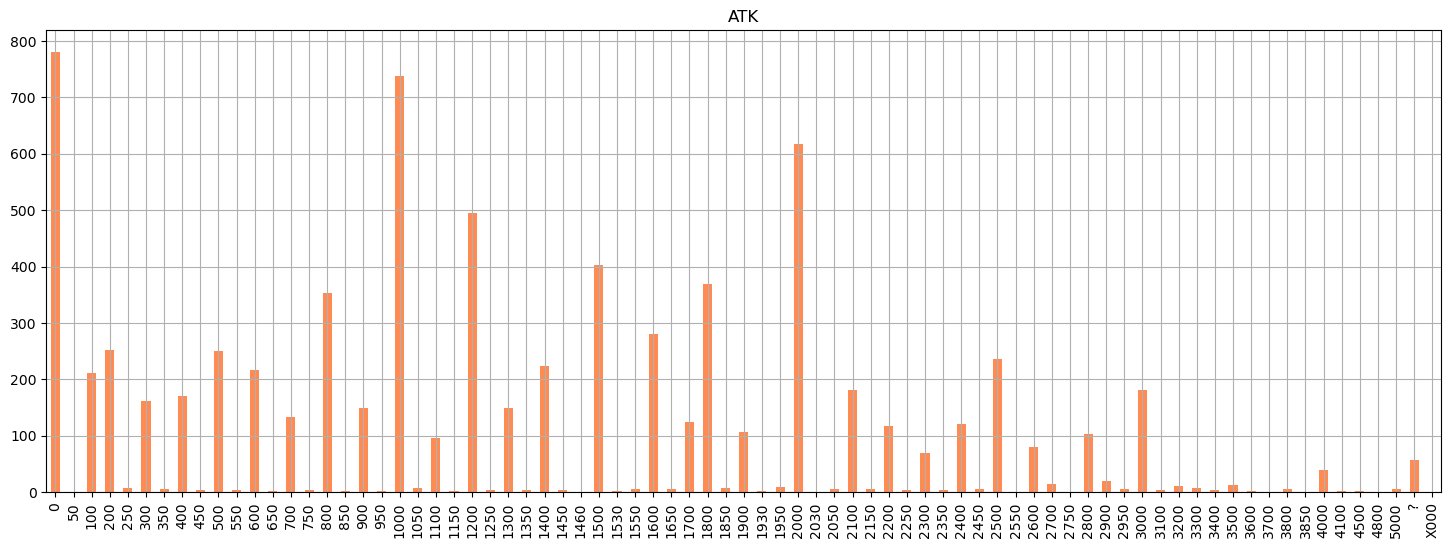

In [42]:
atk_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [43]:
print('Total number of DEF values:', monster_df['DEF'].nunique())

Total number of DEF values: 77


In [44]:
monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Primary type  Secondary type  Attribute  Monster type  \
DEF                                                                           
0      780       748             7               6          6            23   
50       1         1             1               0          1             1   
100    211       209             5               4          6            19   
200    252       251             5               5          6            23   
250      8         8             2               1          4             5   
...    ...       ...           ...             ...        ...           ...   
4500     2         2             2               0          2             2   
4800     1         1             1               0          1             1   
5000     5         5             2               0          3             3   
?       56        49             5               1          7            17   
X000     1         0             0               0          1             1   

      Level/Rank  ATK  Pendulum Scale  Link  Link Arrows  Effect type  \
DEF                                                                     
0             14   45              10     0            0          104   
50             1    1               0     0            0            1   
100           10   24               8     0            0           47   
200           10   31               5     0            0           48   
250            2    4               0     0            0            5   
...          ...  ...             ...   ...          ...          ...   
4500           1    1               0     0            0            2   
4800           1    1               0     0            0            1   
5000           2    2               0     0            0            4   
?             14    2               1     0            0           25   
X000           1    1               0     0            0            0   

      Archseries  Artwork  TCG status  OCG status  Modification date  Errata  
DEF                                                                           
0            260        2           6           5                776       3  
50             1        0           1           1                  1       0  
100           95        2           4           4                208       3  
200          109        2           3           4                252       3  
250            3        0           1           1                  8       1  
...          ...      ...         ...         ...                ...     ...  
4500           1        0           1           1                  2       0  
4800           1        0           1           1                  1       0  
5000           3        1           1           1                  5       1  
?             25        2           4           4                 57       3  
X000           1        0           1           1                  1       0  

[77 rows x 18 columns]

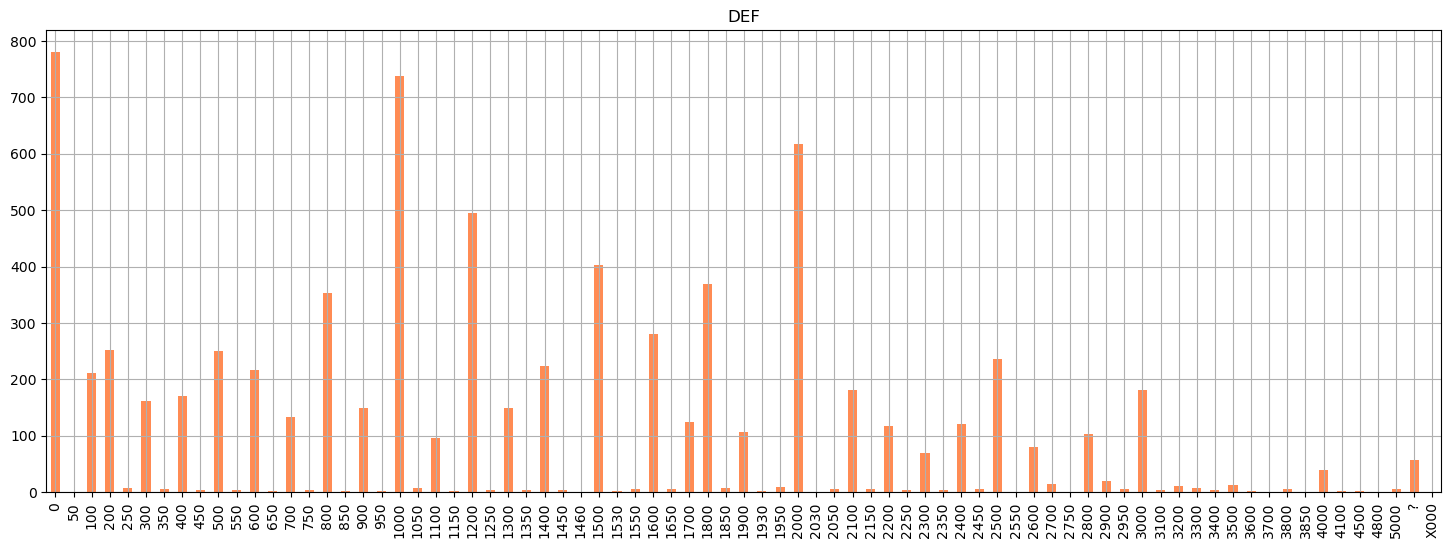

In [45]:
def_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [46]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Primary type  Secondary type  Attribute  \
Level/Rank                                                            
0              6         6             2               0          2   
1            634       604             7               5          6   
2            678       668             6               5          6   
3           1150      1142             6               5          6   
4           2350      2334             6               6          6   
5            599       596             6               6          6   
6            610       606             6               6          6   
7            470       463             6               6          6   
8            678       661             6               5          6   
9            144       142             5               2          6   
10           252       236             5               2          7   
11            32        30             6               3          6   
12            54        51             5               1          6   
13             1         1             1               0          1   
?              1         0             1               0          1   

            Monster type  ATK  DEF  Pendulum Scale  Effect type  Archseries  \
Level/Rank                                                                    
0                      2    3    3               0            5           3   
1                     23   22   29              10           81         228   
2                     23   29   30               7           75         214   
3                     23   41   36               9           94         293   
4                     23   54   47               9          134         513   
5                     23   46   38               8           84         241   
6                     23   38   38               9           92         234   
7                     23   38   35               9          101         226   
8                     23   42   41               8          111         299   
9                     21   31   27               1           56          85   
10                    22   32   33               6           77         150   
11                    13   16   17               1           22          23   
12                    12   13   16               3           33          40   
13                     1    1    1               0            1           1   
?                      1    1    1               0            0           0   

            Artwork  TCG status  OCG status  Modification date  Errata  
Level/Rank                                                              
0                 0           2           2                  6       0  
1                 2           6           5                632       3  
2                 2           5           7                677       3  
3                 3           5           7               1150       3  
4                 3           5           7               2343       3  
5                 2           3           4                599       3  
6                 3           6           6                611       3  
7                 2           5           6                470       3  
8                 3           5           5                678       3  
9                 1           5           4                144       3  
10                2           4           4                255       3  
11                1           3           3                 32       1  
12                1           1           3                 54       2  
13                0           1           1                  1       0  
?                 0           1           1                  1       0

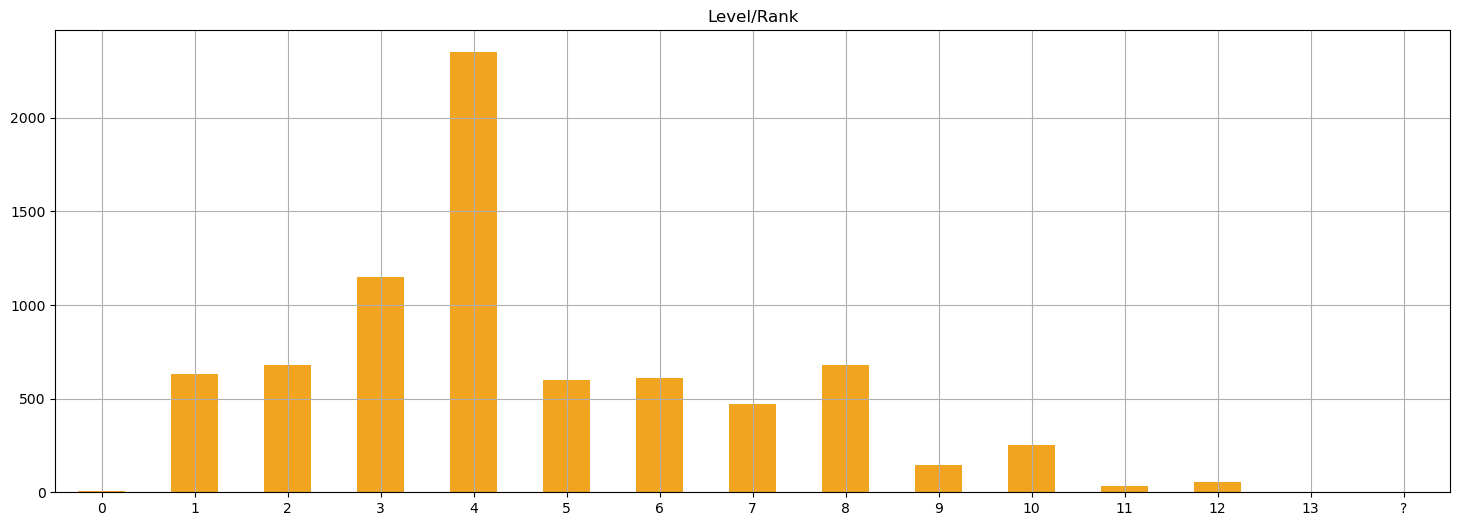

In [47]:
stars_colors = colors_dict['Level']
monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [48]:
monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            624.0   238.701923   350.768129  0.0     0.0   100.0   300.0   
2            676.0   580.547337   408.922156  0.0   300.0   500.0   800.0   
3           1147.0   955.754141   487.516074  0.0   600.0  1000.0  1300.0   
4           2338.0  1418.062447   541.677501  0.0  1200.0  1500.0  1800.0   
5            596.0  1763.708054   641.811912  0.0  1500.0  1900.0  2200.0   
6            607.0  2014.744646   611.962077  0.0  1900.0  2200.0  2400.0   
7            466.0  2285.300429   619.619738  0.0  2200.0  2500.0  2600.0   
8            670.0  2546.940299   706.404851  0.0  2500.0  2800.0  3000.0   
9            141.0  2601.773050   839.183518  0.0  2500.0  2800.0  3000.0   
10           232.0  2817.456897  1216.555708  0.0  2800.0  3000.0  3500.0   
11            31.0  2990.322581  1074.741779  0.0  3000.0  3300.0  3500.0   
12            50.0  3312.000000  1376.573682  0.0  3000.0  4000.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [49]:
monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            626.0   338.258786   519.362998  0.0     0.0   100.0   400.0   
2            677.0   663.810931   557.710037  0.0   200.0   500.0   900.0   
3           1147.0   951.874455   573.459291  0.0   600.0   900.0  1300.0   
4           2340.0  1168.923077   609.217528  0.0   800.0  1200.0  1600.0   
5            597.0  1426.800670   674.875068  0.0  1000.0  1500.0  1900.0   
6            607.0  1553.261944   710.806428  0.0  1200.0  1600.0  2000.0   
7            468.0  1889.957265   653.057050  0.0  1600.0  2000.0  2312.5   
8            677.0  1983.013294   847.485537  0.0  1600.0  2100.0  2500.0   
9            141.0  2318.085106   787.883163  0.0  2000.0  2500.0  2900.0   
10           241.0  2232.572614  1274.618905  0.0  1900.0  2500.0  3000.0   
11            31.0  2672.580645  1151.364315  0.0  2250.0  3000.0  3400.0   
12            51.0  2896.078431  1603.241814  0.0  2000.0  3200.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [50]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Primary type  Secondary type  Attribute  \
Pendulum Scale                                                            
0                 10        10             2               1          5   
1                 70        65             5               2          6   
2                 36        36             2               1          6   
3                 37        37             3               1          6   
4                 33        33             5               0          5   
5                 34        34             2               1          6   
6                 15        15             1               1          4   
7                 27        27             2               1          6   
8                 42        40             5               1          6   
9                  8         8             2               1          3   
10                15        12             5               0          6   
12                 3         3             2               0          2   
13                 1         1             1               0          1   

                Monster type  Level/Rank  ATK  DEF  Effect type  Archseries  \
Pendulum Scale                                                                
0                          7           6    5    5            8           8   
1                         10          11   28   27           38          39   
2                         11           6   17   22           21          15   
3                         16           8   23   15           24          17   
4                          8           8   18   16           25          17   
5                         12           7   23   21           20          16   
6                          7           6   11   11           11           9   
7                         14           6   19   17           14          16   
8                          9           8   19   18           24          22   
9                          3           5    3    2            5           3   
10                         6           6    6    8           11           8   
12                         3           2    3    3            3           3   
13                         1           1    1    1            1           1   

                Artwork  TCG status  OCG status  Modification date  Errata  
Pendulum Scale                                                              
0                     1           1           1                 10       0  
1                     1           3           5                 70       1  
2                     1           3           2                 36       2  
3                     0           1           1                 37       0  
4                     2           1           1                 33       1  
5                     0           3           3                 34       1  
6                     0           1           1                 15       0  
7                     1           1           1                 27       2  
8                     0           1           3                 42       0  
9                     0           1           1                  8       0  
10                    0           2           2                 15       0  
12                    0           1           1                  3       0  
13                    0           1           1                  1       0

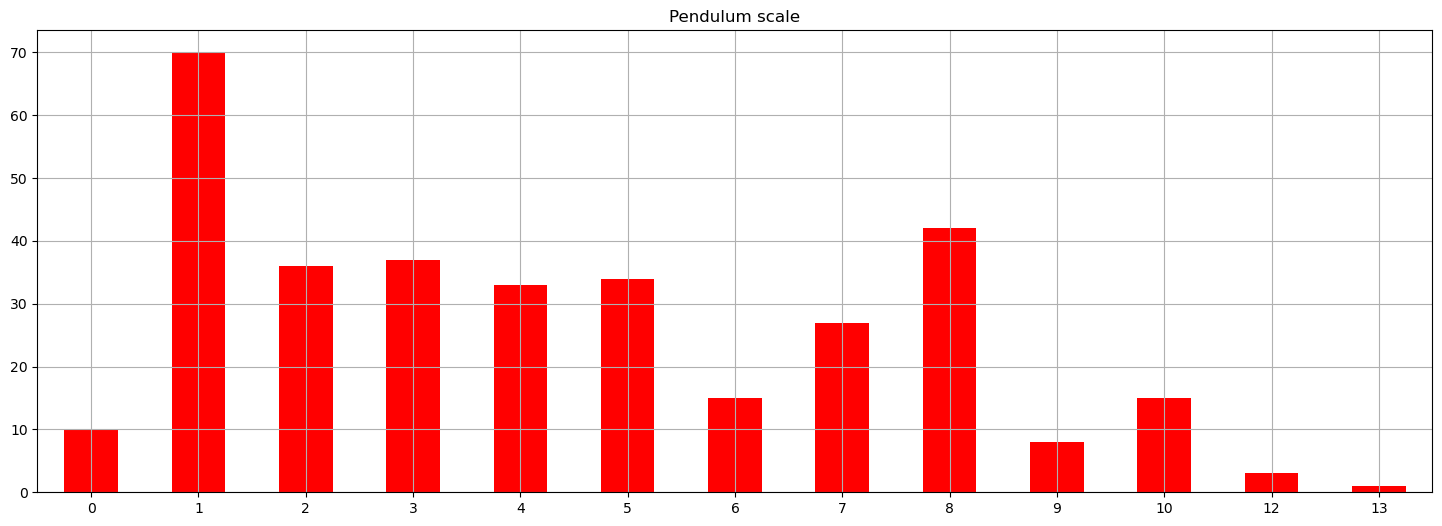

In [51]:
scales_colors = colors_dict['Pendulum Monster']
monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [52]:
monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               10.0  1390.000000  1317.784336     0.0     0.0  1450.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               42.0  1197.619048   953.168809     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1950.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [53]:
monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               10.0  1200.000000  1273.664878     0.0     0.0   750.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               42.0  1050.000000   770.887990     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1650.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [54]:
monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    10.0  6.100000  3.348300  1.0  3.75   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    42.0  3.857143  2.311914  1.0  2.00   4.0   5.50  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [55]:
monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

Name  Password  Attribute  Monster type  ATK  Link Arrows  Effect type  \
Link                                                                           
1       48        47          6            11   10            8           17   
2      186       186          6            23   24           19           32   
3       84        82          6            16   18           17           25   
4       44        41          6            16   12           13           21   
5        9         6          2             5    4            3            6   
6        2         1          1             1    2            2            2   

      Archseries  Artwork  TCG status  OCG status  Modification date  Errata  
Link                                                                          
1             27        1           3           5                 48       0  
2            102        3           2           4                184       2  
3             48        2           2           3                 84       1  
4             24        3           3           4                 44       0  
5              5        0           3           2                  9       0  
6              2        0           1           2                  2       0

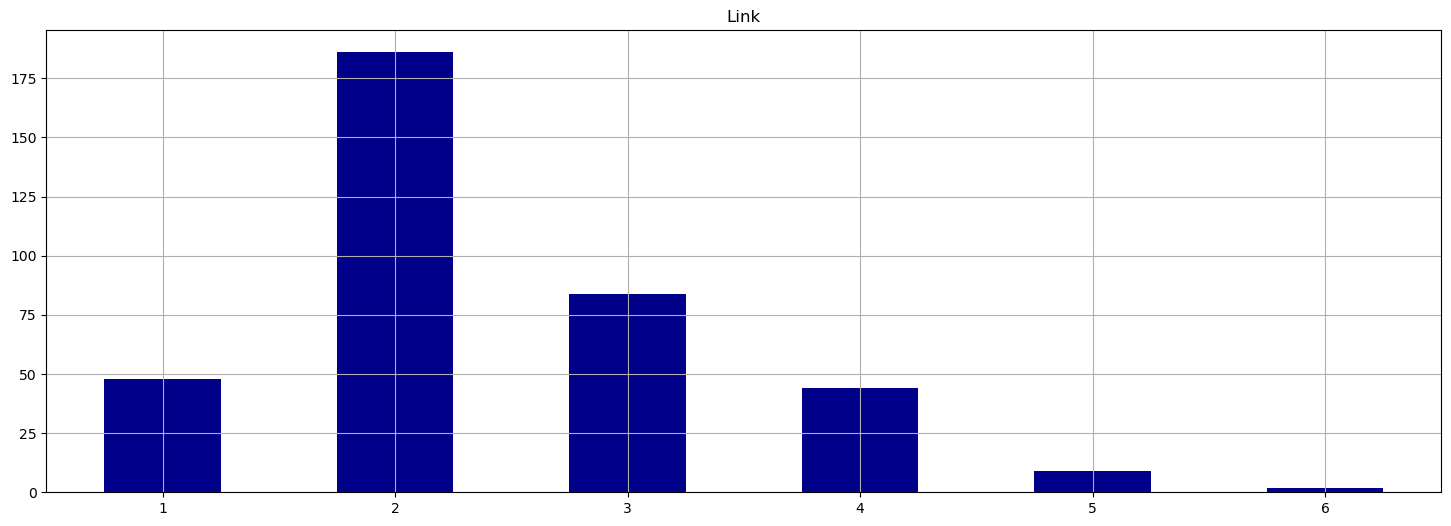

In [56]:
link_colors = colors_dict['Link Monster']
monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [57]:
monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      48.0   737.500000   477.860925     0.0   450.0   800.0  1000.0  1500.0
2     186.0  1405.645161   508.849113     0.0  1100.0  1500.0  1800.0  2300.0
3      84.0  2258.928571   651.234264     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [58]:
print('Total number of link arrow combinations:', monster_df['Link Arrows'].nunique())

Total number of link arrow combinations: 62


In [59]:
monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

Name  Password  Attribute  Monster type  ATK  Effect type  \
Link Arrows                                                               
(←,)             5         5          2             3    2            4   
(←, ↑)           4         4          2             3    4            3   
(←, →)          18        18          6             8   11            8   
(←, →, ↑)        8         7          4             5    6            7   
(↑,)            10        10          5             5    6            9   
...            ...       ...        ...           ...  ...          ...   
(↙, ↘, ←, ↖)     1         1          1             1    1            1   
(↙, ↘, ↑)       22        22          6            11   11           11   
(↙, ↘, →)        2         2          2             2    2            2   
(↙, ↘, ↖)        2         2          2             2    2            2   
(↙, ↘, ↖, ↗)     1         1          1             1    1            1   

              Archseries  Artwork  TCG status  OCG status  Modification date  \
Link Arrows                                                                    
(←,)                   4        0           3           2                  5   
(←, ↑)                 2        0           1           1                  4   
(←, →)                 9        1           2           2                 18   
(←, →, ↑)              5        0           1           2                  8   
(↑,)                   5        0           1           1                 10   
...                  ...      ...         ...         ...                ...   
(↙, ↘, ←, ↖)           1        0           1           1                  1   
(↙, ↘, ↑)             15        2           2           2                 22   
(↙, ↘, →)              2        0           1           1                  2   
(↙, ↘, ↖)              0        0           1           1                  2   
(↙, ↘, ↖, ↗)           1        0           1           1                  1   

              Errata  
Link Arrows           
(←,)               0  
(←, ↑)             0  
(←, →)             0  
(←, →, ↑)          0  
(↑,)               0  
...              ...  
(↙, ↘, ←, ↖)       0  
(↙, ↘, ↑)          1  
(↙, ↘, →)          0  
(↙, ↘, ↖)          0  
(↙, ↘, ↖, ↗)       0  

[62 rows x 12 columns]

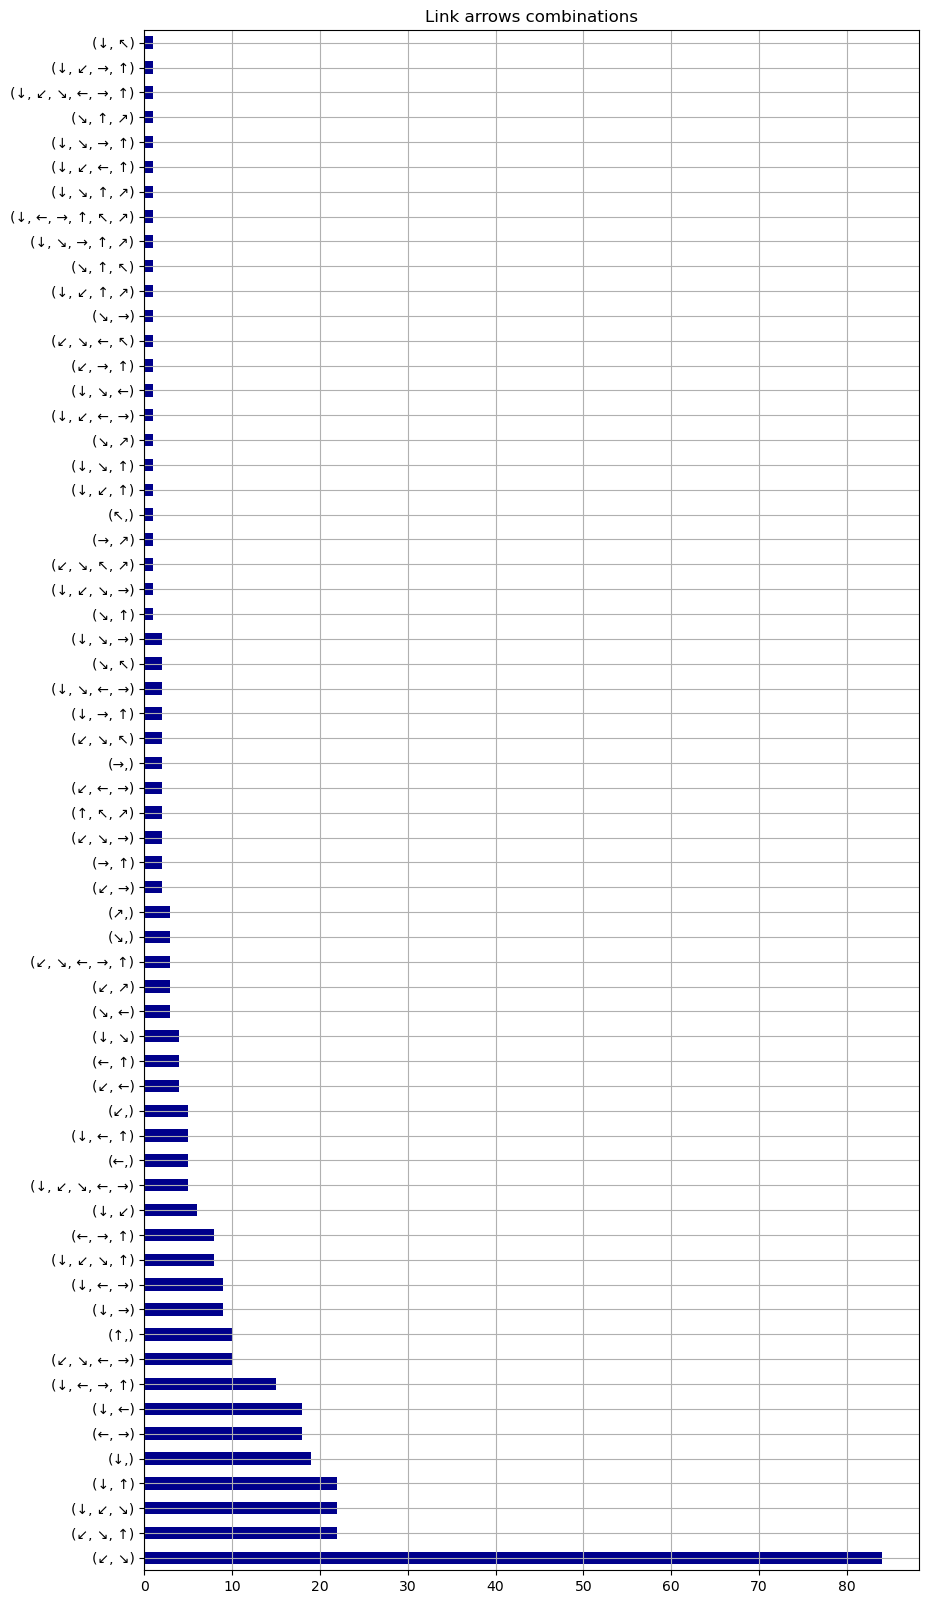

In [60]:
arrows_colors = colors_dict['Link Monster']
monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [61]:
monster_df[monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

Name  Password  Attribute  Monster type  ATK  Link  Effect type  \
Link Arrows                                                                    
←             117       109          6            21   29     6           35   
↑             117       112          6            19   27     6           31   
→             103        95          6            19   27     6           30   
↓             162       153          6            20   32     6           41   
↖              12        11          5             5   10     5            7   
↗              16        15          5             7   11     6            7   
↘             188       184          6            22   33     6           36   
↙             190       186          6            22   34     6           37   

             Archseries  Artwork  TCG status  OCG status  Modification date  \
Link Arrows                                                                   
←                    46        3           5           4                117   
↑                    44        3           4           5                117   
→                    40        2           4           4                103   
↓                    70        3           3           5                161   
↖                     6        2           1           3                 12   
↗                     8        2           1           3                 16   
↘                   103        3           4           5                187   
↙                   104        3           4           6                189   

             Errata  
Link Arrows          
←                 0  
↑                 1  
→                 0  
↓                 0  
↖                 0  
↗                 0  
↘                 2  
↙                 2

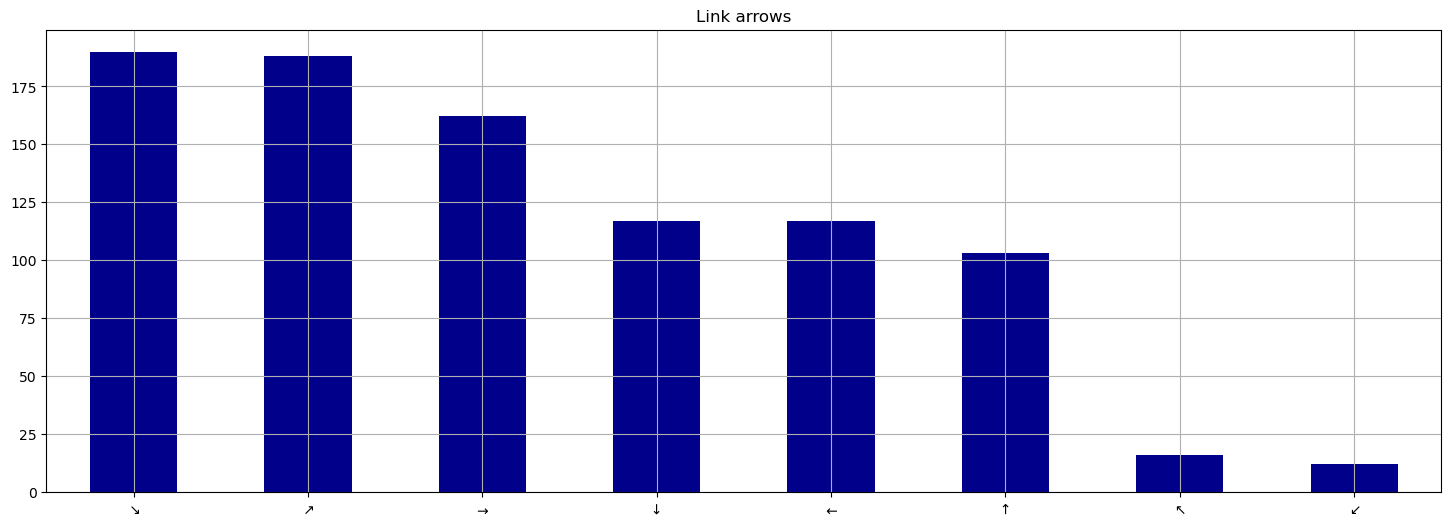

In [62]:
arrows_colors_b = colors_dict['Link Monster']
monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [63]:
arrow_per_link = monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

Link          1   2   3   4  5  6
Link Arrows                      
←             5  47  25  30  8  2
↑            10  29  44  28  4  2
→             2  33  26  31  9  2
↓            19  60  43  32  6  2
↖             1   3   5   2  0  1
↗             3   5   3   3  1  1
↘             3  96  54  25  9  1
↙             5  99  52  25  8  1

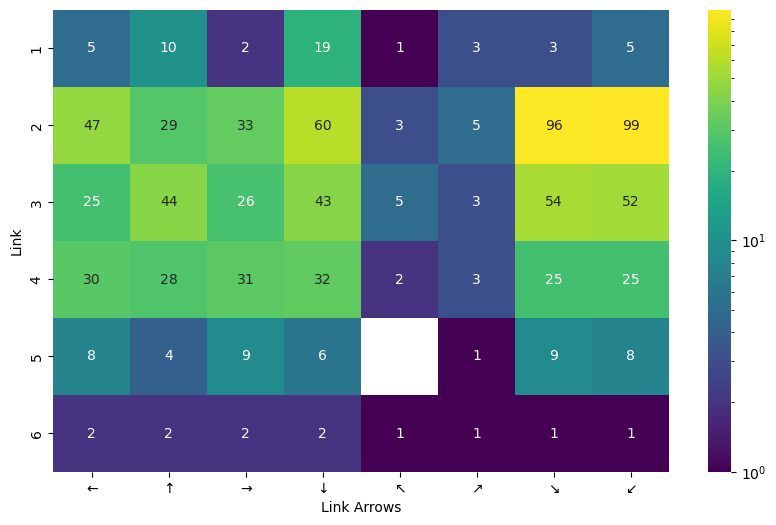

In [64]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

## Spell & Trap

### Properties

In [65]:
print('Total number of properties:', st_df['Property'].nunique())

Total number of properties: 9


In [66]:
st_df.drop(columns=['Card type']).groupby('Property').nunique()

Name  Password  Effect type  Archseries  Artwork  \
Property                                                                  
Continuous Spell Card   422       417           54         162        2   
Continuous Trap Card    494       484           64         162        1   
Counter Trap Card       157       153           19          59        1   
Equip Spell Card        264       263           37          74        1   
Field Spell Card        276       271           35         143        1   
Normal Spell Card       921       915           43         231        3   
Normal Trap Card       1172      1162           48         240        2   
Quick-Play Spell Card   433       424           35         140        1   
Ritual Spell Card        75        75            8          25        1   

                       TCG status  OCG status  Modification date  Errata  
Property                                                                  
Continuous Spell Card           5           5                418       3  
Continuous Trap Card            3           3                493       3  
Counter Trap Card               2           3                157       2  
Equip Spell Card                3           3                264       3  
Field Spell Card                5           5                277       3  
Normal Spell Card               5           6                920       3  
Normal Trap Card                6           5               1169       2  
Quick-Play Spell Card           3           4                430       3  
Ritual Spell Card               2           1                 75       2

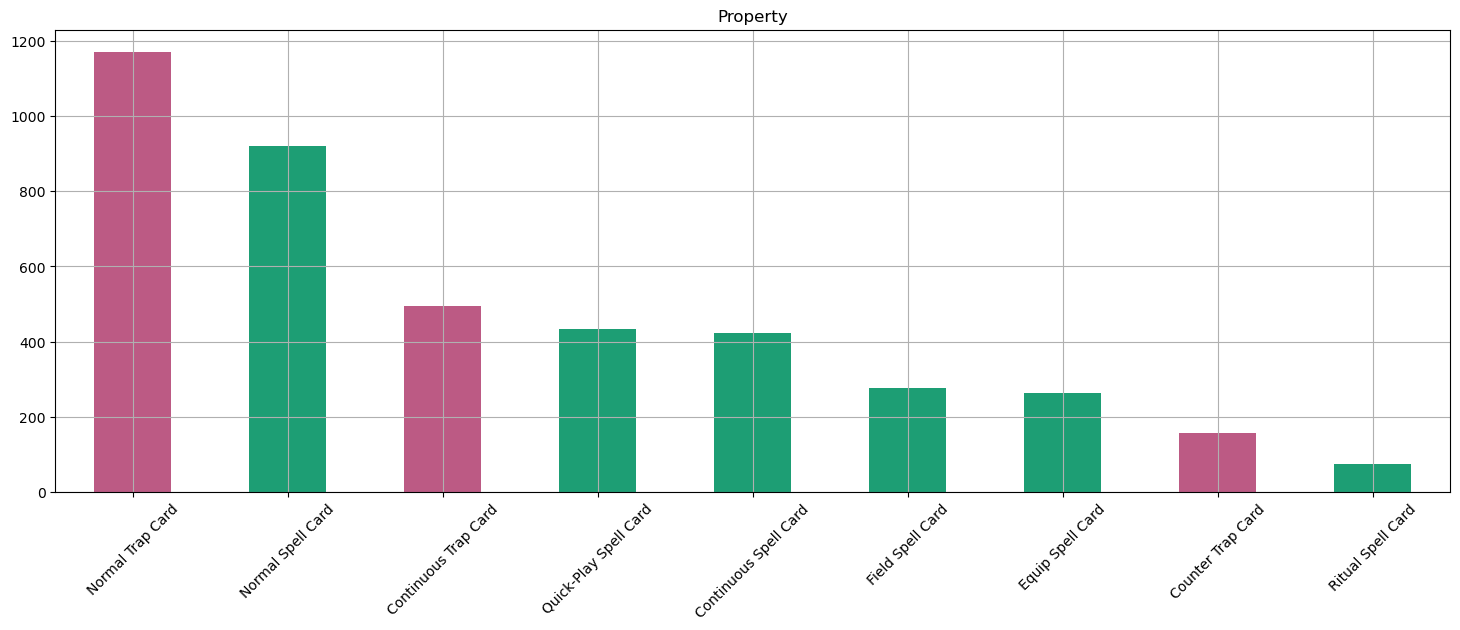

In [67]:
st_colors = [colors_dict[i] for i in full_df[['Card type','Property']].value_counts().index.get_level_values(0)]
st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [68]:
print('Total number of effect types:', st_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [69]:
st_df.explode('Effect type').groupby('Effect type').nunique()

Name  Password  Card type  Property  Archseries  \
Effect type                                                               
Activation condition     835       828          2         8         171   
Condition               1696      1662          2         9         374   
Continuous Effect         21        21          2         6          12   
Continuous-like Effect   903       891          2         7         236   
Cost                     452       450          2         7         112   
Effect                  2953      2915          2         9         431   
Ignition Effect            2         2          2         2           2   
Ignition-like Effect     446       434          1         6         185   
Lingering effect          96        94          2         6          43   
Maintenance cost          22        22          2         5           7   
Quick Effect               9         9          2         3           4   
Quick-like Effect        344       335          2         4         149   
Trigger Effect           846       838          2         9         258   
Unclassified effect       86        84          2         9          50   

                        Artwork  TCG status  OCG status  Modification date  \
Effect type                                                                  
Activation condition          2           5           5                834   
Condition                     2           6           5               1674   
Continuous Effect             1           2           1                 20   
Continuous-like Effect        2           5           5                901   
Cost                          2           5           4                452   
Effect                        3           6           6               2936   
Ignition Effect               0           2           1                  2   
Ignition-like Effect          2           4           5                443   
Lingering effect              1           4           4                 96   
Maintenance cost              1           3           2                 22   
Quick Effect                  0           1           1                  9   
Quick-like Effect             1           4           4                344   
Trigger Effect                1           4           5                838   
Unclassified effect           1           2           3                 86   

                        Errata  
Effect type                     
Activation condition         3  
Condition                    3  
Continuous Effect            2  
Continuous-like Effect       3  
Cost                         3  
Effect                       3  
Ignition Effect              0  
Ignition-like Effect         2  
Lingering effect             2  
Maintenance cost             1  
Quick Effect                 0  
Quick-like Effect            1  
Trigger Effect               3  
Unclassified effect          1

#### Spell & Trap discrimination

In [70]:
spell = spell_df['Effect type'].explode('Effect type').value_counts().rename('Spell Card')
trap = trap_df['Effect type'].explode('Effect type').value_counts().rename('Trap Card')
st_diff = pd.concat([spell, trap], axis = 1).fillna(0).astype(int)
st_diff

Spell Card  Trap Card
Effect                        1539       1415
Condition                     1148        549
Continuous-like Effect         619        285
Trigger Effect                 571        275
Ignition-like Effect           446          0
Activation condition           245        590
Cost                           241        211
Unclassified effect             64         22
Lingering effect                56         40
Maintenance cost                11         11
Continuous Effect                7         14
Quick Effect                     4          5
Quick-like Effect                3        341
Ignition Effect                  1          1

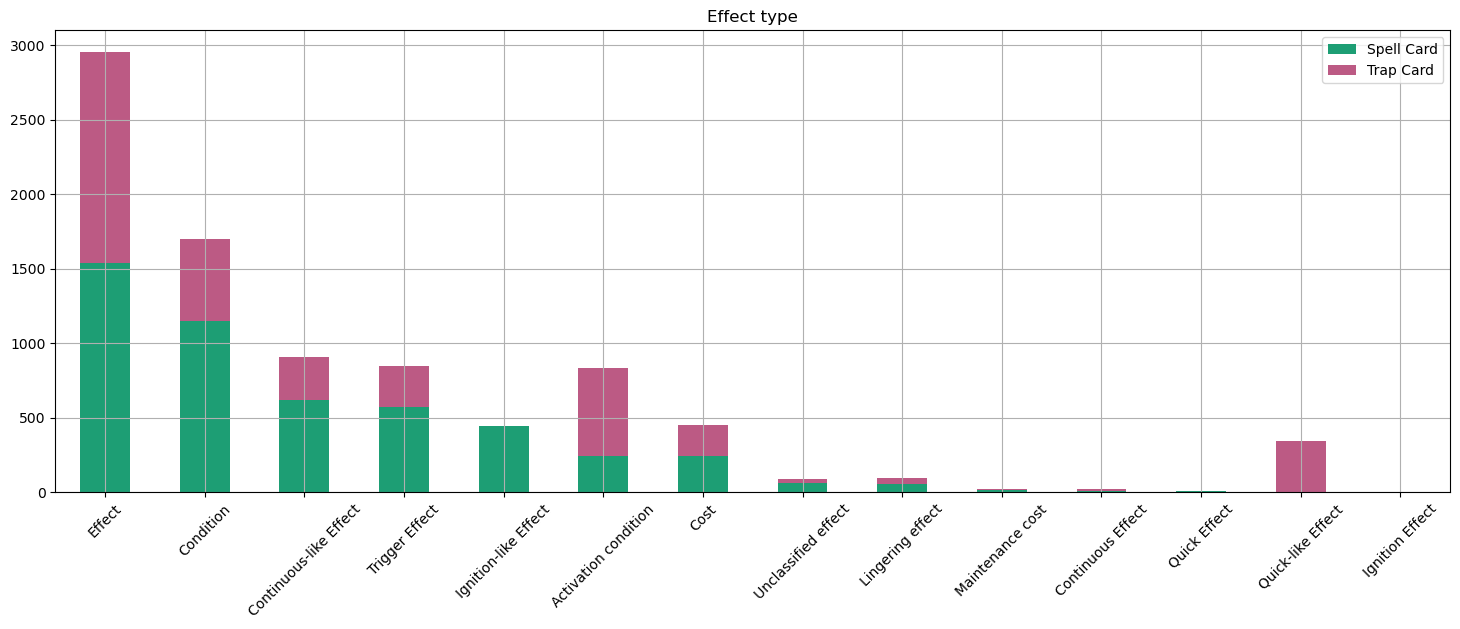

In [71]:
st_diff_colors = {'Spell Card': colors_dict['Spell Card'], 'Trap Card': colors_dict['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors, title = 'Effect type')
plt.show()

## Archseries

In [72]:
exploded_archseries = full_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries: 715


In [73]:
exploded_archseries.groupby('Archseries').nunique()

Name  Password  Card type  Property  Effect type  Artwork  \
Archseries                                                                     
"C"                   9         9          1         0            7        0   
-Eyes Dragon         73        73          1         0           44        1   
/Assault Mode         7         7          1         0            5        0   
@Ignister            18        18          1         0            9        0   
A-to-Z               16        16          1         0            5        2   
...                 ...       ...        ...       ...          ...      ...   
sphinx               10        10          2         1            9        0   
sprout                2         2          1         0            2        0   
tellarknight         25        21          2         4           12        0   
with Chain            4         4          1         1            4        1   
with Eyes of Blue     8         8          2         2            6        0   

                   TCG status  OCG status  Modification date  Errata  \
Archseries                                                             
"C"                         2           1                  9       1   
-Eyes Dragon                2           2                 73       3   
/Assault Mode               1           1                  7       0   
@Ignister                   1           1                 18       0   
A-to-Z                      1           1                 16       3   
...                       ...         ...                ...     ...   
sphinx                      1           1                 10       0   
sprout                      1           1                  2       0   
tellarknight                1           3                 25       0   
with Chain                  1           1                  4       0   
with Eyes of Blue           1           1                  8       1   

                   Primary type  Secondary type  Attribute  Monster type  \
Archseries                                                                 
"C"                           2               0          1             1   
-Eyes Dragon                  7               2          6             3   
/Assault Mode                 1               0          5             6   
@Ignister                     6               1          6             1   
A-to-Z                        3               1          1             1   
...                         ...             ...        ...           ...   
sphinx                        1               0          2             2   
sprout                        1               0          1             1   
tellarknight                  2               0          2             4   
with Chain                    0               0          0             0   
with Eyes of Blue             1               1          1             1   

                   Level/Rank  ATK  DEF  Pendulum Scale  Link  Link Arrows  
Archseries                                                                  
"C"                         8    9    8               0     0            0  
-Eyes Dragon               10   16   13               6     1            1  
/Assault Mode               5    6    6               0     0            0  
@Ignister                   7   10    9               0     3            4  
A-to-Z                      4   13   12               0     0            0  
...                       ...  ...  ...             ...   ...          ...  
sphinx                      4    8    5               0     0            0  
sprout                      1    1    1               0     0            0  
tellarknight                2   16   15               2     0            0  
with Chain                  0    0    0               0     0            0  
with Eyes of Blue           1    3    4               0     0            0  

[715 rows x 20 columns]

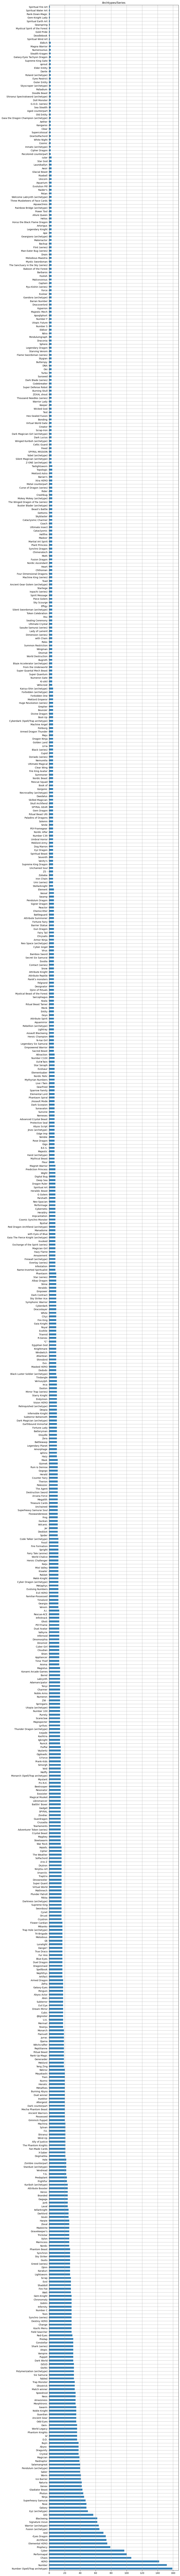

In [74]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [75]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

Card type          Monster Card  Spell Card  Trap Card   All
Archseries                                                  
"C"                           9           0          0     9
-Eyes Dragon                 73           0          0    73
/Assault Mode                 7           0          0     7
@Ignister                    18           0          0    18
A-to-Z                       16           0          0    16
...                         ...         ...        ...   ...
sprout                        2           0          0     2
tellarknight                 20           5          0    25
with Chain                    0           0          4     4
with Eyes of Blue             5           3          0     8
All                        7358        1374        906  9638

[716 rows x 4 columns]

### By primary type

In [76]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b

Primary type       Effect Monster  Fusion Monster  Link Monster  \
Archseries                                                        
"C"                             8               0             0   
-Eyes Dragon                   31              11             1   
/Assault Mode                   7               0             0   
@Ignister                      10               1             4   
A-to-Z                          6               8             0   
...                           ...             ...           ...   
sphinx                          9               0             0   
sprout                          2               0             0   
tellarknight                   14               0             0   
with Eyes of Blue               5               0             0   
All                          4722             538           341   

Primary type       Monster Token  Normal Monster  Ritual Monster  \
Archseries                                                         
"C"                            0               1               0   
-Eyes Dragon                   0               3               4   
/Assault Mode                  0               0               0   
@Ignister                      0               0               1   
A-to-Z                         0               2               0   
...                          ...             ...             ...   
sphinx                         0               0               0   
sprout                         0               0               0   
tellarknight                   0               0               0   
with Eyes of Blue              0               0               0   
All                            1             244             121   

Primary type       Synchro Monster  Xyz Monster   All  
Archseries                                             
"C"                              0            0     9  
-Eyes Dragon                     5           18    73  
/Assault Mode                    0            0     7  
@Ignister                        1            1    18  
A-to-Z                           0            0    16  
...                            ...          ...   ...  
sphinx                           0            0     9  
sprout                           0            0     2  
tellarknight                     0            6    20  
with Eyes of Blue                0            0     5  
All                            445          942  7354  

[653 rows x 9 columns]



### By secondary type

In [77]:
archseries_crosstab_c = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Secondary type'], margins = True)
archseries_crosstab_c

Secondary type     Flip monster  Gemini monster  Spirit monster  Toon monster  \
Archseries                                                                      
-Eyes Dragon                  0               2               0             2   
@Ignister                     0               0               0             0   
A-to-Z                        0               0               0             0   
Adamancipator                 0               0               0             0   
Alien                         1               1               0             0   
...                         ...             ...             ...           ...   
itsu                          0               0               0             0   
lswarm                        2               0               0             0   
roid                          0               0               0             0   
with Eyes of Blue             0               0               0             0   
All                         128              28              13            36   

Secondary type     Tuner monster  Union monster  All  
Archseries                                            
-Eyes Dragon                   0              0    4  
@Ignister                      1              0    1  
A-to-Z                         0              6    6  
Adamancipator                  3              0    3  
Alien                          1              0    3  
...                          ...            ...  ...  
itsu                           0              2    2  
lswarm                         0              0    2  
roid                           9              0    9  
with Eyes of Blue              5              0    5  
All                          430             18  653  

[202 rows x 7 columns]

### By monster type

In [78]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

Monster type       Aqua  Beast  Beast-Warrior  Creator God  Cyberse  Dinosaur  \
Archseries                                                                      
"C"                   0      0              0            0        0         0   
-Eyes Dragon          0      0              0            0        0         0   
/Assault Mode         0      0              0            0        0         0   
@Ignister             0      0              0            0       18         0   
A-to-Z                0      0              0            0        0         0   
...                 ...    ...            ...          ...      ...       ...   
sphinx                0      3              0            0        0         0   
sprout                0      0              0            0        0         0   
tellarknight          0      0              0            0        0         0   
with Eyes of Blue     0      0              0            0        0         0   
All                 196    296            183            2      158        86   

Monster type       Divine-Beast  Dragon  Fairy  Fiend  ...  Reptile  Rock  \
Archseries                                             ...                  
"C"                           0       0      0      0  ...        0     0   
-Eyes Dragon                  0      68      0      0  ...        0     0   
/Assault Mode                 0       2      0      0  ...        0     0   
@Ignister                     0       0      0      0  ...        0     0   
A-to-Z                        0       0      0      0  ...        0     0   
...                         ...     ...    ...    ...  ...      ...   ...   
sphinx                        0       0      0      0  ...        0     6   
sprout                        0       0      0      0  ...        0     0   
tellarknight                  0       0      0      1  ...        0     0   
with Eyes of Blue             0       0      0      0  ...        0     0   
All                          12     729    456    700  ...      138   216   

Monster type       Sea Serpent  Spellcaster  Thunder  Warrior  Winged Beast  \
Archseries                                                                    
"C"                          0            0        0        0             0   
-Eyes Dragon                 0            0        0        0             0   
/Assault Mode                0            1        0        1             0   
@Ignister                    0            0        0        0             0   
A-to-Z                       0            0        0        0             0   
...                        ...          ...      ...      ...           ...   
sphinx                       0            0        0        0             0   
sprout                       0            0        0        0             0   
tellarknight                 0            1        0       17             0   
with Eyes of Blue            0            5        0        0             0   
All                         71          585       96     1253           270   

Monster type       Wyrm  Zombie   All  
Archseries                             
"C"                   0       0     9  
-Eyes Dragon          0       3    73  
/Assault Mode         0       1     7  
@Ignister             0       0    18  
A-to-Z                0       0    16  
...                 ...     ...   ...  
sphinx                0       0     9  
sprout                0       0     2  
tellarknight          1       0    20  
with Eyes of Blue     0       0     5  
All                  78     158  7358  

[653 rows x 26 columns]

### By property

In [79]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

Property           Continuous Spell Card  Continuous Trap Card  \
Archseries                                                       
A.I.                                   1                     3   
Abyss Actor                            0                     0   
Abyss Script                           1                     0   
Abyss-                                 0                     1   
Adamancipator                          0                     0   
...                                  ...                   ...   
sphinx                                 0                     1   
tellarknight                           1                     0   
with Chain                             0                     0   
with Eyes of Blue                      1                     0   
All                                  246                   290   

Property           Counter Trap Card  Equip Spell Card  Field Spell Card  \
Archseries                                                                 
A.I.                               0                 0                 1   
Abyss Actor                        0                 0                 0   
Abyss Script                       0                 0                 0   
Abyss-                             0                 3                 0   
Adamancipator                      1                 0                 1   
...                              ...               ...               ...   
sphinx                             0                 0                 0   
tellarknight                       0                 1                 1   
with Chain                         0                 0                 0   
with Eyes of Blue                  0                 0                 0   
All                               74               132               181   

Property           Normal Spell Card  Normal Trap Card  Quick-Play Spell Card  \
Archseries                                                                      
A.I.                               4                 1                      2   
Abyss Actor                        1                 2                      0   
Abyss Script                       5                 0                      1   
Abyss-                             0                 3                      0   
Adamancipator                      2                 1                      0   
...                              ...               ...                    ...   
sphinx                             0                 0                      0   
tellarknight                       0                 0                      2   
with Chain                         0                 4                      0   
with Eyes of Blue                  0                 0                      2   
All                              515               542                    262   

Property           Ritual Spell Card   All  
Archseries                                  
A.I.                               1    13  
Abyss Actor                        0     3  
Abyss Script                       0     7  
Abyss-                             0     7  
Adamancipator                      0     5  
...                              ...   ...  
sphinx                             0     1  
tellarknight                       0     5  
with Chain                         0     4  
with Eyes of Blue                  0     3  
All                               38  2280  

[399 rows x 10 columns]

## Artworks

In [80]:
print('Total number of cards with edited or alternate artworks:', full_df['Artwork'].count())

Total number of cards with edited or alternate artworks: 609


In [81]:
full_df[['Name','Password','TCG status','OCG status','Artwork']][full_df['Artwork'].notna()]

Name  Password TCG status OCG status    Artwork
16           A Deal with Dark Ruler  06850209  Unlimited  Unlimited  (Edited,)
30      A-to-Z-Dragon Buster Cannon  65172015  Unlimited  Unlimited  (Edited,)
49                     Absolute End  27744077  Unlimited  Unlimited  (Edited,)
53       Absorbing Kid from the Sky  49771608  Unlimited  Unlimited  (Edited,)
63     Abyss Actor - Mellow Madonna  78310590  Unlimited  Unlimited  (Edited,)
...                             ...       ...        ...        ...        ...
12115         Yorishiro of the Aqua  57511992  Unlimited  Unlimited  (Edited,)
12228                       Zombino  14575467  Unlimited  Unlimited  (Edited,)
12230              Zombyra the Dark  88472456  Unlimited  Unlimited  (Edited,)
12232               Zoodiac Barrage  46060017  Forbidden    Limited  (Edited,)
12235            Zoodiac Bunnyblast  04367330  Unlimited  Unlimited  (Edited,)

[609 rows x 5 columns]

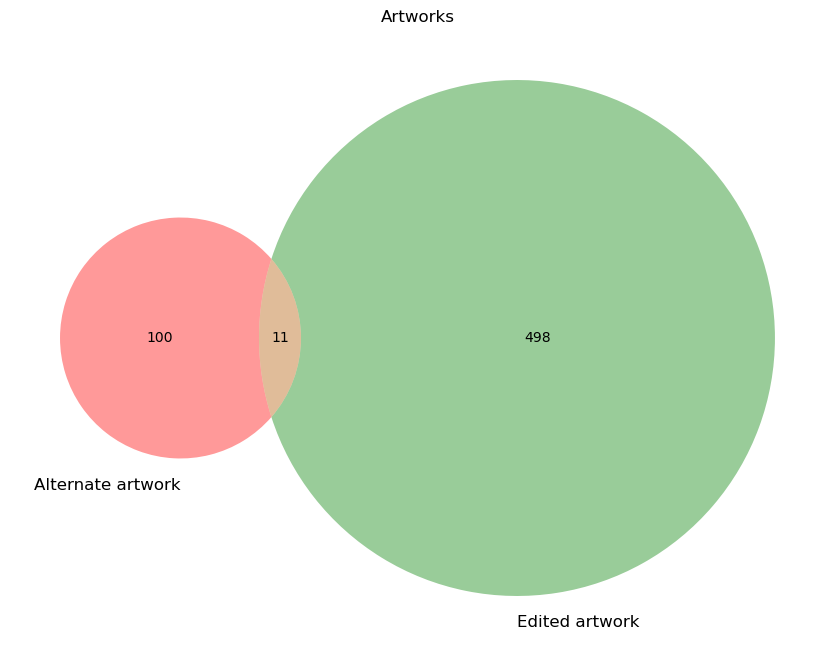

In [82]:
artwork_value_counts = full_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [83]:
artwork_crosstab = pd.crosstab(full_df['Artwork'], full_df['Card type'])
artwork_crosstab

Card type            Monster Card  Spell Card  Trap Card
Artwork                                                 
(Alternate,)                   88           7          5
(Alternate, Edited)            10           1          0
(Edited,)                     280         116        102

### By primary type

In [84]:
artwork_crosstab_b = pd.crosstab(full_df['Artwork'], full_df['Primary type'])
artwork_crosstab_b

Primary type         Effect Monster  Fusion Monster  Link Monster  \
Artwork                                                             
(Alternate,)                     37              13             9   
(Alternate, Edited)               2               1             5   
(Edited,)                       183              19            10   

Primary type         Normal Monster  Ritual Monster  Synchro Monster  \
Artwork                                                                
(Alternate,)                     21               0                3   
(Alternate, Edited)               2               0                0   
(Edited,)                        42               6                5   

Primary type         Xyz Monster  
Artwork                           
(Alternate,)                   5  
(Alternate, Edited)            0  
(Edited,)                     15

More granularity is unnecessary

## Errata

In [85]:
print('Total number of cards with name or type errata:', full_df['Errata'].count())

Total number of cards with name or type errata: 1138


In [86]:
full_df[['Name','Password','TCG status','OCG status','Errata']][full_df['Errata'].notna()]

Name  Password TCG status OCG status  \
0        "A" Cell Breeding Device  34541863  Unlimited  Unlimited   
13                    7 Completed  86198326  Unlimited  Unlimited   
16         A Deal with Dark Ruler  06850209  Unlimited  Unlimited   
21              A Legendary Ocean  00295517  Unlimited  Unlimited   
26     A Wingbeat of Giant Dragon  28596933  Unlimited  Unlimited   
...                           ...       ...        ...        ...   
12106               Yellow Gadget  13839120  Unlimited  Unlimited   
12114                   Yomi Ship  51534754  Unlimited  Unlimited   
12146                Z-Metal Tank  64500000  Unlimited  Unlimited   
12170  Zaborg the Thunder Monarch  51945556  Unlimited  Unlimited   
12230            Zombyra the Dark  88472456  Unlimited  Unlimited   

             Errata  
0           (Name,)  
13          (Type,)  
16     (Name, Type)  
21          (Type,)  
26          (Type,)  
...             ...  
12106       (Type,)  
12114       (Type,)  
12146       (Type,)  
12170       (Type,)  
12230       (Name,)  

[1138 rows x 5 columns]

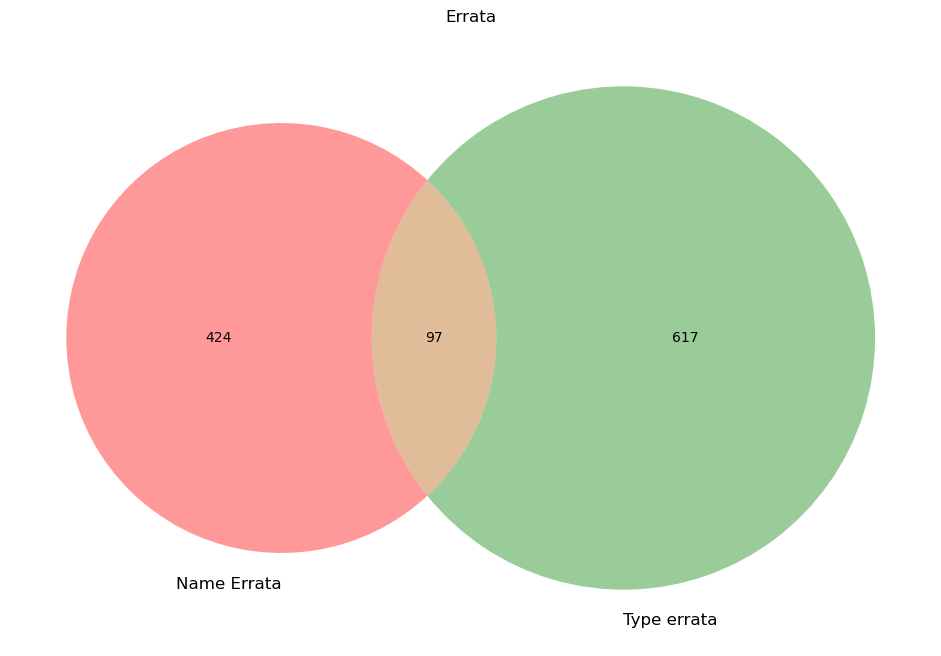

In [87]:
errata_value_counts = full_df['Errata'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Errata')
venn2(subsets = (errata_value_counts[('Name',)], errata_value_counts[('Type',)],errata_value_counts[('Name','Type')]), set_labels = ('Name Errata', 'Type errata'))
plt.show()

### By card type

In [88]:
errata_crosstab = pd.crosstab(full_df['Errata'], full_df['Card type'])
errata_crosstab

Card type     Monster Card  Spell Card  Trap Card
Errata                                           
(Name,)                313          59         52
(Name, Type)            74          21          2
(Type,)                399         209          9

### By primary type

In [89]:
errata_crosstab_b = pd.crosstab(full_df['Errata'], full_df['Primary type'])
errata_crosstab_b

Primary type  Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Errata                                                                       
(Name,)                  198              46             4              49   
(Name, Type)              39              10             0              18   
(Type,)                  274              22             2              61   

Primary type  Ritual Monster  Synchro Monster  Xyz Monster  
Errata                                                      
(Name,)                    3                9            3  
(Name, Type)               2                5            0  
(Type,)                    2               24           14

More granularity is unnecessary

### By artwork

In [90]:
errata_crosstab_c = pd.crosstab(full_df['Artwork'], full_df['Errata'])
errata_crosstab_c

Errata               (Name,)  (Name, Type)  (Type,)
Artwork                                            
(Alternate,)               8            16       22
(Alternate, Edited)        0             3        2
(Edited,)                 26            12       53

## TCG & OCG status

### TGC status

In [91]:
print('Total number of TCG status:', full_df['TCG status'].nunique())

Total number of TCG status: 7


In [92]:
full_df.groupby('TCG status', dropna=False).nunique()

Name  Password  Card type  Property  Effect type  \
TCG status                                                            
Forbidden           100       100          3         7           47   
Illegal              38         0          3         3            6   
Legal                22         0          1         0            0   
Limited              80        80          3         5           41   
Not yet released     56        55          3         8           33   
Semi-Limited          4         4          3         2            4   
Unlimited         11496     11493          3         9          347   
NaN                 458       337          3         9           85   

                  Archseries  Artwork  OCG status  Modification date  Errata  \
TCG status                                                                     
Forbidden                 54        1           4                100       3   
Illegal                    6        0           1                 38       1   
Legal                     14        1           1                 22       1   
Limited                   43        3           4                 80       3   
Not yet released          15        0           1                 45       0   
Semi-Limited               4        0           2                  4       1   
Unlimited               1141        3           5              11400       3   
NaN                      123        1           5                441       1   

                  Primary type  Secondary type  Attribute  Monster type  \
TCG status                                                                
Forbidden                    5               2          6            19   
Illegal                      5               0          6            14   
Legal                        1               0          5            13   
Limited                      6               3          6            16   
Not yet released             6               1          6             6   
Semi-Limited                 2               0          2             2   
Unlimited                    7               6          7            24   
NaN                          8               3          7            23   

                  Level/Rank  ATK  DEF  Pendulum Scale  Link  Link Arrows  
TCG status                                                                 
Forbidden                 12   26   19               2     4           10  
Illegal                    5   11   12               2     2            2  
Legal                      6    6    7               0     0            0  
Limited                    9   23   21               3     1            1  
Not yet released           9   13   13               0     1            1  
Semi-Limited               2    2    2               0     0            0  
Unlimited                 14   80   75              13     6           60  
NaN                       12   53   39               7     5            9

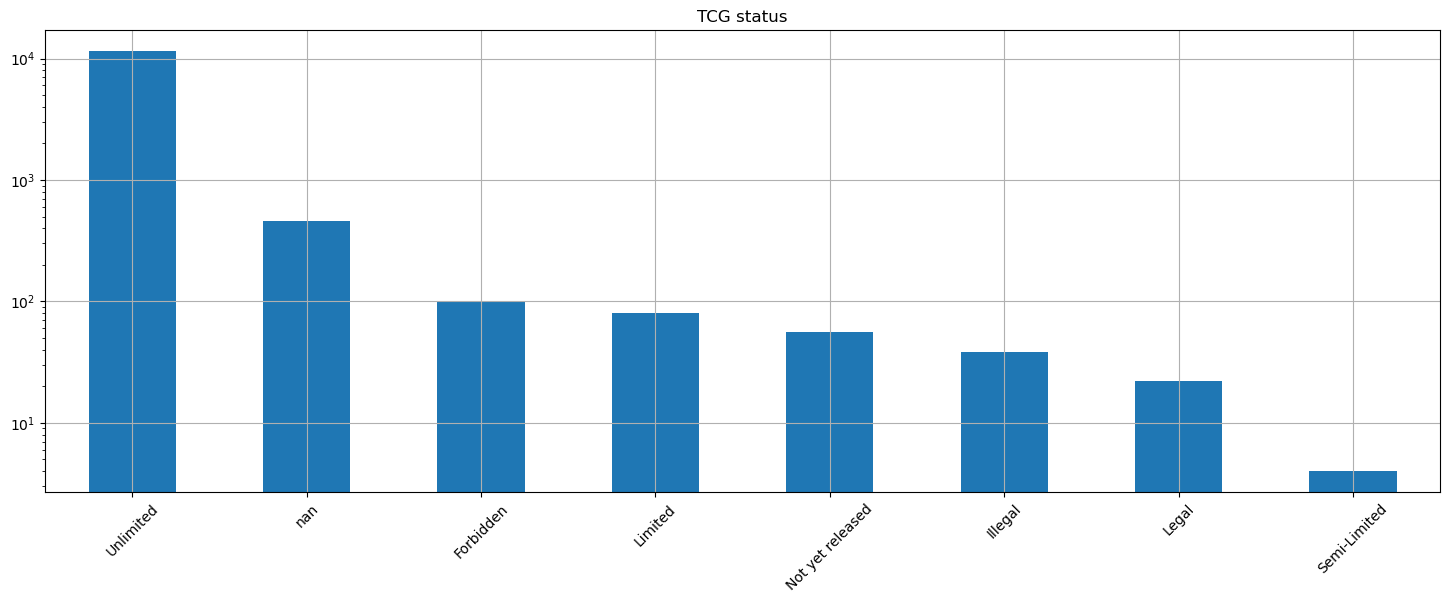

In [93]:
full_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [94]:
# Remove unlimited
tcg_crosstab = pd.crosstab(full_df['Card type'], full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

TCG status    Forbidden  Illegal  Legal  Limited  Not yet released  \
Card type                                                            
Monster Card         64       35     22       44                23   
Spell Card           26        2      0       34                25   
Trap Card            10        1      0        2                 8   

TCG status    Semi-Limited  
Card type                   
Monster Card             2  
Spell Card               1  
Trap Card                1

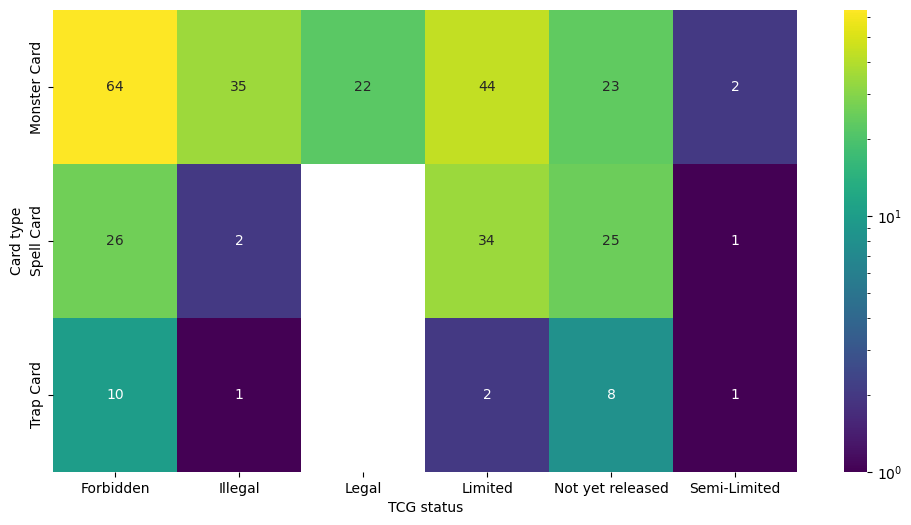

In [95]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=mc.LogNorm())
plt.show()

#### By monster type

In [96]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(full_df['Monster type'], full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

TCG status     Forbidden  Illegal  Legal  Limited  Not yet released  \
Monster type                                                          
Aqua                   1        0      2        1                 0   
Beast                  0        3      1        2                 0   
Beast-Warrior          2        3      0        2                 0   
Cyberse                2        0      1        1                 1   
Dinosaur               0        0      1        2                 0   
Divine-Beast           0        3      0        0                 0   
Dragon                11        3      1        7                 2   
Fairy                  3        4      3        2                 7   
Fiend                  5        2      4        3                 0   
Fish                   1        0      0        0                 0   
Insect                 2        0      0        0                 0   
Machine                6        4      3        6                 4   
Plant                  6        1      0        0                 0   
Psychic                2        1      0        1                 0   
Pyro                   0        0      0        0                 0   
Reptile                1        0      1        1                 0   
Rock                   2        1      1        4                 0   
Sea Serpent            1        0      0        0                 0   
Spellcaster            8        5      1        8                 1   
Thunder                1        1      0        0                 0   
Warrior                4        2      2        2                 8   
Winged Beast           2        2      0        1                 0   
Wyrm                   4        0      0        1                 0   
Zombie                 0        0      1        0                 0   

TCG status     Semi-Limited  
Monster type                 
Aqua                      0  
Beast                     0  
Beast-Warrior             0  
Cyberse                   0  
Dinosaur                  0  
Divine-Beast              0  
Dragon                    0  
Fairy                     0  
Fiend                     0  
Fish                      0  
Insect                    0  
Machine                   0  
Plant                     0  
Psychic                   0  
Pyro                      0  
Reptile                   0  
Rock                      0  
Sea Serpent               0  
Spellcaster               0  
Thunder                   0  
Warrior                   1  
Winged Beast              1  
Wyrm                      0  
Zombie                    0

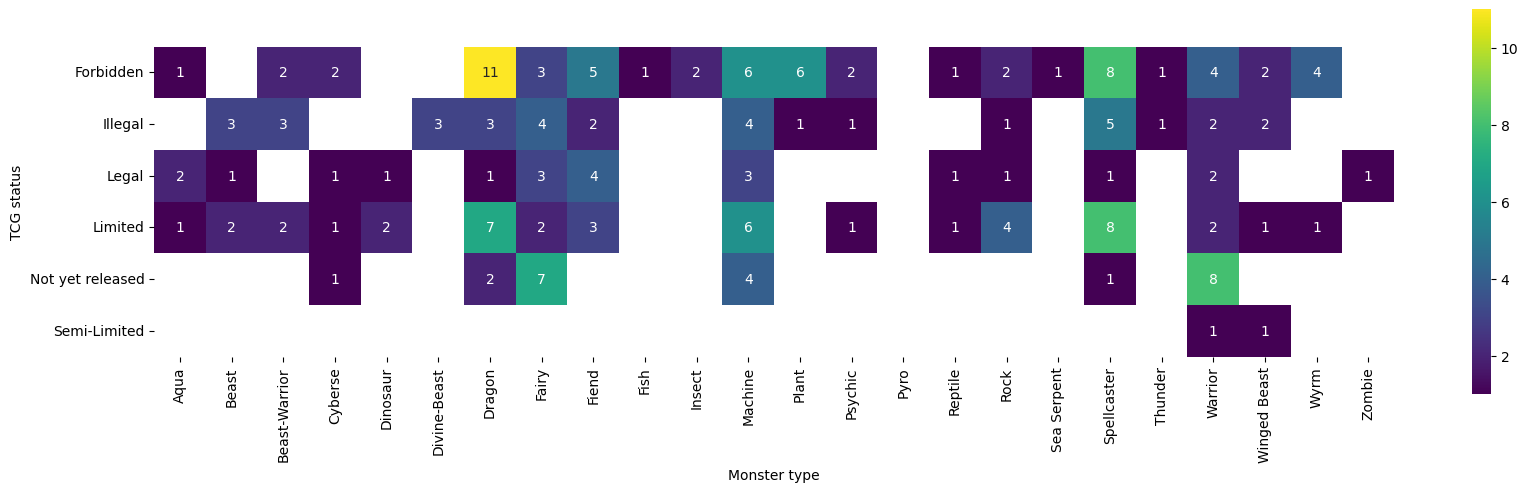

In [97]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [98]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

TCG status                 Forbidden  Illegal  Legal  Limited  \
Archseries                                                      
-Eyes Dragon                       1        0      0        0   
Adventurer Token (series)          0        0      0        0   
Amazoness                          0        0      0        0   
Ancient Gear                       0        0      1        0   
Attribute Knight                   0        0      0        1   
...                              ...      ...    ...      ...   
Zexal                              1        0      0        0   
Zoodiac                            3        0      0        1   
roid                               0        0      0        1   
tellarknight                       0        0      0        0   
All                               62       39     17       33   

TCG status                 Not yet released  Semi-Limited  Unlimited  All  
Archseries                                                                 
-Eyes Dragon                              0             0          0    1  
Adventurer Token (series)                 0             0          2    2  
Amazoness                                 0             0          1    1  
Ancient Gear                              0             0          0    1  
Attribute Knight                          0             0          0    1  
...                                     ...           ...        ...  ...  
Zexal                                     0             0          0    1  
Zoodiac                                   0             0          0    4  
roid                                      0             0          0    1  
tellarknight                              0             0          1    1  
All                                       1             3         70  225  

[123 rows x 8 columns]

### OCG status

In [99]:
print('Total number of OCG status:', full_df['OCG status'].nunique())

Total number of OCG status: 7


In [100]:
full_df.groupby('OCG status', dropna=False).nunique()

Name  Password  Card type  Property  Effect type  \
OCG status                                                            
Forbidden            87        87          3         6           40   
Illegal              32         1          3         2            8   
Legal                39         0          1         0            0   
Limited              76        76          3         6           34   
Not yet released     76         1          3         8           38   
Semi-Limited         23        23          2         4           17   
Unlimited         11879     11854          3         9          353   
NaN                  38        25          3         6           15   

                  Archseries  Artwork  TCG status  Modification date  Errata  \
OCG status                                                                     
Forbidden                 45        1           3                 87       3   
Illegal                    8        0           1                 32       1   
Legal                     24        1           1                 39       1   
Limited                   43        3           3                 76       3   
Not yet released          37        0           1                 76       0   
Semi-Limited              14        2           4                 23       2   
Unlimited               1162        3           5              11764       3   
NaN                        5        0           3                 38       0   

                  Primary type  Secondary type  Attribute  Monster type  \
OCG status                                                                
Forbidden                    5               3          6            19   
Illegal                      6               1          6            12   
Legal                        2               0          6            17   
Limited                      6               2          6            15   
Not yet released             7               2          5            14   
Semi-Limited                 2               1          4             6   
Unlimited                    7               6          7            25   
NaN                          5               1          6            13   

                  Level/Rank  ATK  DEF  Pendulum Scale  Link  Link Arrows  
OCG status                                                                 
Forbidden                 11   24   21               3     4            8  
Illegal                    8   14   15               2     2            2  
Legal                      7    8    8               0     0            0  
Limited                    9   21   21               3     3            3  
Not yet released          12   20   18               2     3            4  
Semi-Limited               4    8    6               0     2            2  
Unlimited                 14   81   76              13     6           59  
NaN                        6   12   14               0     1            1

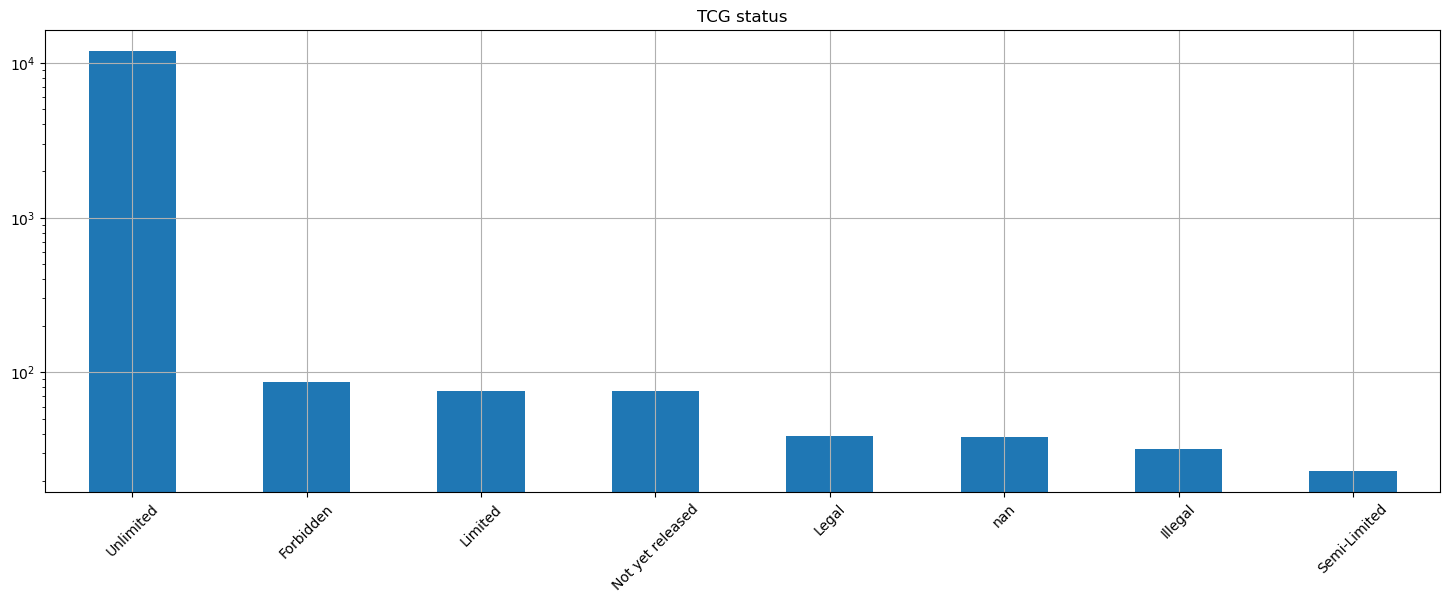

In [101]:
full_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [102]:
# Remove unlimited
ocg_crosstab = pd.crosstab(full_df['Card type'], full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

OCG status    Forbidden  Illegal  Legal  Limited  Not yet released  \
Card type                                                            
Monster Card         56       30     39       44                47   
Spell Card           21        1      0       29                17   
Trap Card            10        1      0        3                12   

OCG status    Semi-Limited  
Card type                   
Monster Card             8  
Spell Card              15  
Trap Card                0

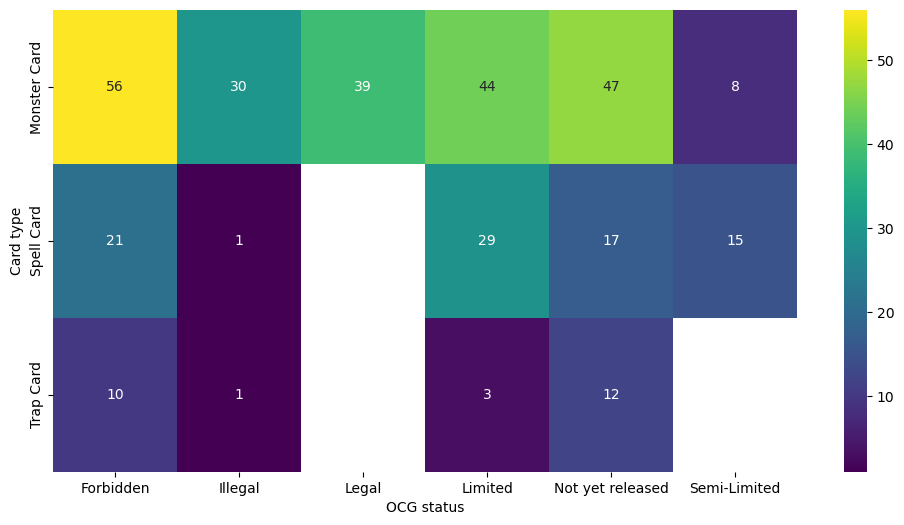

In [103]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [104]:
ocg_crosstab_b = pd.crosstab(full_df['Monster type'], full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

OCG status     Forbidden  Illegal  Legal  Limited  Not yet released  \
Monster type                                                          
Aqua                   3        0      2        1                 1   
Beast                  1        2      4        0                 2   
Beast-Warrior          3        2      0        1                 1   
Creator God            0        0      0        0                 0   
Cyberse                2        0      2        1                 7   
Dinosaur               0        0      1        1                 0   
Divine-Beast           0        3      0        0                 0   
Dragon                 9        3      1        6                 4   
Fairy                  2        3      4        4                 7   
Fiend                  5        1      7        0                 1   
Fish                   1        0      0        0                 0   
Insect                 1        0      0        0                 1   
Machine                5        3      6        6                 9   
Plant                  5        0      1        1                 0   
Psychic                1        1      0        5                 3   
Pyro                   0        0      1        1                 0   
Reptile                1        0      1        0                 0   
Rock                   1        1      1        2                 0   
Sea Serpent            1        0      0        0                 0   
Spellcaster            7        7      1        8                 3   
Thunder                0        0      1        3                 1   
Warrior                3        3      3        3                 6   
Winged Beast           3        1      1        1                 0   
Wyrm                   2        0      0        0                 1   
Zombie                 0        0      2        0                 0   

OCG status     Semi-Limited  
Monster type                 
Aqua                      2  
Beast                     0  
Beast-Warrior             1  
Creator God               0  
Cyberse                   0  
Dinosaur                  0  
Divine-Beast              0  
Dragon                    0  
Fairy                     0  
Fiend                     1  
Fish                      0  
Insect                    0  
Machine                   2  
Plant                     0  
Psychic                   0  
Pyro                      0  
Reptile                   0  
Rock                      0  
Sea Serpent               0  
Spellcaster               1  
Thunder                   0  
Warrior                   1  
Winged Beast              0  
Wyrm                      0  
Zombie                    0

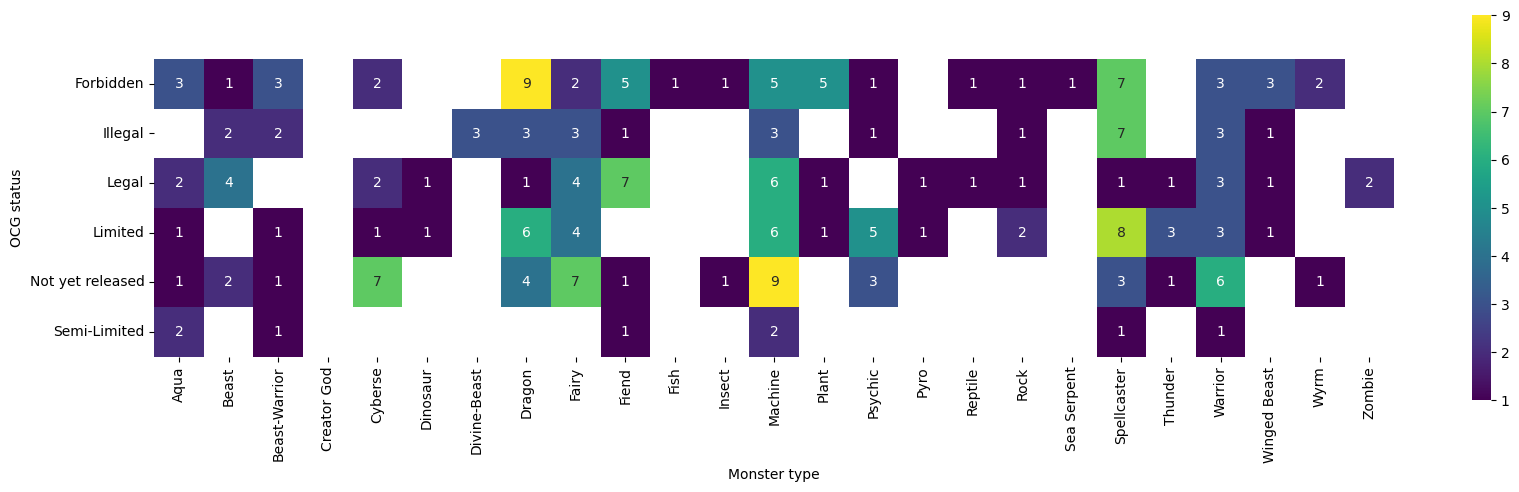

In [105]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [106]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

OCG status                 Forbidden  Illegal  Legal  Limited  \
Archseries                                                      
-Eyes Dragon                       1        0      0        0   
Adventurer Token (series)          1        0      0        0   
Albaz Dragon                       0        0      0        0   
Amazement                          0        0      0        0   
Amazoness                          1        0      0        0   
...                              ...      ...    ...      ...   
Zombie counterpart                 0        0      1        0   
Zoodiac                            2        0      0        2   
roid                               0        0      0        1   
tellarknight                       0        0      0        1   
All                               72       33     27       65   

OCG status                 Not yet released  Semi-Limited  All  
Archseries                                                      
-Eyes Dragon                              0             0    1  
Adventurer Token (series)                 0             1    2  
Albaz Dragon                              1             0    1  
Amazement                                 1             0    1  
Amazoness                                 0             0    1  
...                                     ...           ...  ...  
Zombie counterpart                        0             0    1  
Zoodiac                                   0             0    4  
roid                                      0             0    1  
tellarknight                              4             0    5  
All                                      73            17  287  

[156 rows x 7 columns]

### TCG vs. OCG status

In [107]:
cg_crosstab = pd.crosstab(full_df['OCG status'],full_df['TCG status'], dropna=False, margins = False)
cg_crosstab

TCG status        Forbidden  Illegal  Legal  Limited  Not yet released  \
OCG status                                                               
Forbidden                70        0      0        4                 0   
Illegal                   0       26      0        0                 0   
Legal                     0        0     22        0                 0   
Limited                   8        0      0       37                 0   
Not yet released          0        0      0        0                 0   
Semi-Limited              1        0      0        4                 0   
Unlimited                21        0      0       35                55   

TCG status        Semi-Limited  Unlimited  
OCG status                                 
Forbidden                    0         13  
Illegal                      0          0  
Legal                        0          0  
Limited                      0         30  
Not yet released             0          1  
Semi-Limited                 2         16  
Unlimited                    2      11413

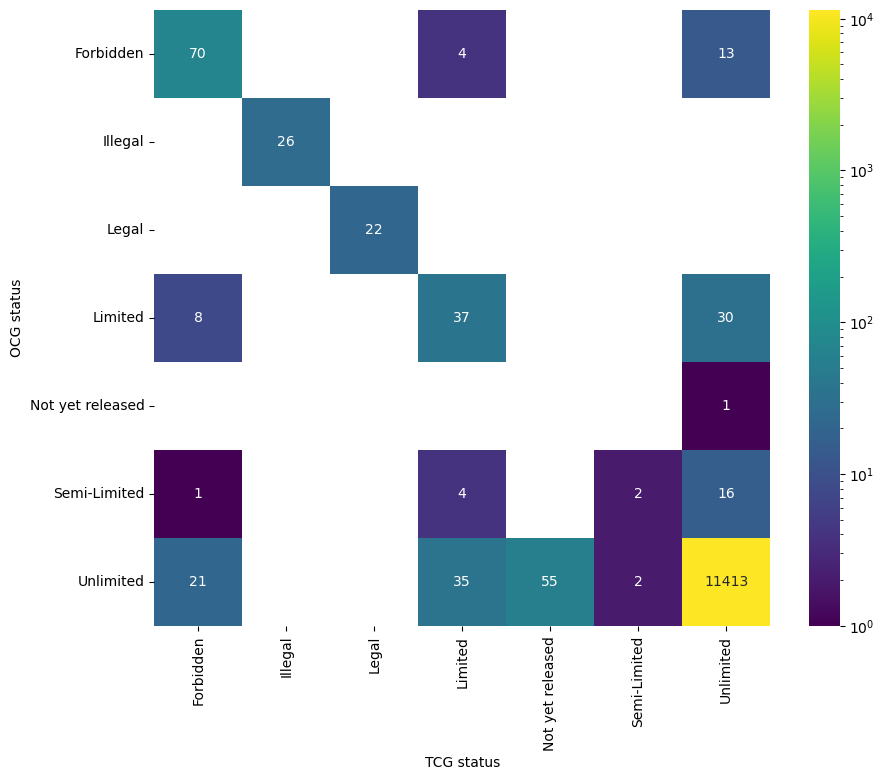

In [108]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

# Extras

## Not yet released

In [109]:
full_df.loc[full_df['OCG status'] == 'Not yet released'].loc[full_df['TCG status'] == 'Not yet released']

Empty DataFrame
Columns: [Name, Password, Card type, Property, Effect type, Archseries, Artwork, TCG status, OCG status, Modification date, Errata, Primary type, Secondary type, Attribute, Monster type, Level/Rank, ATK, DEF, Pendulum Scale, Link, Link Arrows]
Index: []

[0 rows x 21 columns]

# HTML export

In [110]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk


In [111]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML
[NbConvertApp] Writing 4461932 bytes to ../Cards.html


# Git

In [ ]:
! git add "../*[Cc]ards.*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.strftime("%d%m%Y")+"'"}